<a href="https://colab.research.google.com/github/Gameto2025/Primer_Desafio_TelecomX/blob/main/Primer_Desafio__TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.  Extracción y Conversion a Dataframe.

In [1]:
import pandas as pd
import requests
import json

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
data = json.loads(response.text)

print(data[:2])

[{'customerID': '0002-ORFBO', 'Churn': 'No', 'customer': {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}, 'account': {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}, {'customerID': '0003-MKNFE', 'Churn': 'No', 'customer': {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}, 'account': {'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMeth

#### Revisando los datos extraidos.

In [2]:
import pprint
pprint.pprint(data[0])

{'Churn': 'No',
 'account': {'Charges': {'Monthly': 65.6, 'Total': '593.3'},
             'Contract': 'One year',
             'PaperlessBilling': 'Yes',
             'PaymentMethod': 'Mailed check'},
 'customer': {'Dependents': 'Yes',
              'Partner': 'Yes',
              'SeniorCitizen': 0,
              'gender': 'Female',
              'tenure': 9},
 'customerID': '0002-ORFBO',
 'internet': {'DeviceProtection': 'No',
              'InternetService': 'DSL',
              'OnlineBackup': 'Yes',
              'OnlineSecurity': 'No',
              'StreamingMovies': 'No',
              'StreamingTV': 'Yes',
              'TechSupport': 'Yes'},
 'phone': {'MultipleLines': 'No', 'PhoneService': 'Yes'}}


#### Conversion de datos a dataframe para analisis

In [3]:
response = requests.get(url)
data = json.loads(response.text)

# Aplanar columnas anidadas
df = pd.json_normalize(data, sep='_')

df.columns.tolist()
df.sample(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
4503,6172-FECYY,Yes,Male,0,Yes,Yes,49,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,Month-to-month,No,Electronic check,84.50,4254.85
2744,3797-FKOGQ,No,Male,0,No,Yes,11,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,No,Electronic check,86.20,893.2
2429,3394-UQYIB,,Female,1,Yes,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,No,Credit card (automatic),50.15,115.1
4898,6695-FRVEC,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),60.40,3953.7
3235,4521-WFJAI,No,Male,0,No,No,56,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),25.95,1444.05
1839,2616-FLVQC,No,Male,0,No,No,64,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.55,1240.15
5245,7153-OANIO,Yes,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Electronic check,69.95,69.95
1568,2235-EZAIK,No,Female,0,Yes,No,72,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),79.20,5401.9
816,1157-BQCUW,Yes,Male,0,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.95,74.95
4059,5561-NWEVX,Yes,Female,1,Yes,No,2,Yes,Yes,Fiber optic,...,No,Yes,No,No,No,Month-to-month,No,Electronic check,79.20,172.85


# 2. Transformación y Limpieza de los datos

#### Explorar las columnas del dataset y Verificar sus tipos de datos.

In [4]:
df.columns.tolist()

['customerID',
 'Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod',
 'account_Charges_Monthly',
 'account_Charges_Total']

#### Renombrar las columnas al español

In [5]:
df = df.rename(columns={
    'customerID': 'ID_cliente',
    'Churn': 'Abandono_cliente',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'Cliente_senior',
    'customer_Partner': 'Tiene_pareja',
    'customer_Dependents': 'Tiene_dependientes',
    'customer_tenure': 'Antiguedad_meses',
    'phone_PhoneService': 'Servicio_telefonico',
    'phone_MultipleLines': 'Multiples_lineas_telefonicas',
    'internet_InternetService': 'Servicio_internet',
    'internet_OnlineSecurity': 'Seguridad_en_línea_Internet',
    'internet_OnlineBackup': 'Respaldo_en_línea_Internet',
    'internet_DeviceProtection': 'Proteccion_de_dispositivos_Internet',
    'internet_TechSupport': 'Soporte_tecnico_Internet',
    'internet_StreamingTV': 'Streaming_TV_Internet',
    'internet_StreamingMovies': 'Streaming_peliculas_Internet',
    'account_Contract': 'Tipo_de_contrato',
    'account_PaperlessBilling': 'Facturacion_on_line',
    'account_PaymentMethod': 'Metodo_de_pago',
    'account_Charges_Monthly': 'Cargo_mensual',
    'account_Charges_Total': 'Cargo_total',

})
print(df.columns)

Index(['ID_cliente', 'Abandono_cliente', 'Genero', 'Cliente_senior',
       'Tiene_pareja', 'Tiene_dependientes', 'Antiguedad_meses',
       'Servicio_telefonico', 'Multiples_lineas_telefonicas',
       'Servicio_internet', 'Seguridad_en_línea_Internet',
       'Respaldo_en_línea_Internet', 'Proteccion_de_dispositivos_Internet',
       'Soporte_tecnico_Internet', 'Streaming_TV_Internet',
       'Streaming_peliculas_Internet', 'Tipo_de_contrato',
       'Facturacion_on_line', 'Metodo_de_pago', 'Cargo_mensual',
       'Cargo_total'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID_cliente                           7267 non-null   object 
 1   Abandono_cliente                     7267 non-null   object 
 2   Genero                               7267 non-null   object 
 3   Cliente_senior                       7267 non-null   int64  
 4   Tiene_pareja                         7267 non-null   object 
 5   Tiene_dependientes                   7267 non-null   object 
 6   Antiguedad_meses                     7267 non-null   int64  
 7   Servicio_telefonico                  7267 non-null   object 
 8   Multiples_lineas_telefonicas         7267 non-null   object 
 9   Servicio_internet                    7267 non-null   object 
 10  Seguridad_en_línea_Internet          7267 non-null   object 
 11  Respaldo_en_línea_Internet    

### Estandarizacion y transformacion de datos:

In [7]:
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    print(f"\nValores únicos en '{col}':")
    print(df[col].unique())


Valores únicos en 'ID_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en 'Abandono_cliente':
['No' 'Yes' '']

Valores únicos en 'Genero':
['Female' 'Male']

Valores únicos en 'Tiene_pareja':
['Yes' 'No']

Valores únicos en 'Tiene_dependientes':
['Yes' 'No']

Valores únicos en 'Servicio_telefonico':
['Yes' 'No']

Valores únicos en 'Multiples_lineas_telefonicas':
['No' 'Yes' 'No phone service']

Valores únicos en 'Servicio_internet':
['DSL' 'Fiber optic' 'No']

Valores únicos en 'Seguridad_en_línea_Internet':
['No' 'Yes' 'No internet service']

Valores únicos en 'Respaldo_en_línea_Internet':
['Yes' 'No' 'No internet service']

Valores únicos en 'Proteccion_de_dispositivos_Internet':
['No' 'Yes' 'No internet service']

Valores únicos en 'Soporte_tecnico_Internet':
['Yes' 'No' 'No internet service']

Valores únicos en 'Streaming_TV_Internet':
['Yes' 'No' 'No internet service']

Valores únicos en 'Streaming_peliculas_Internet':

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID_cliente                           7267 non-null   object 
 1   Abandono_cliente                     7267 non-null   object 
 2   Genero                               7267 non-null   object 
 3   Cliente_senior                       7267 non-null   int64  
 4   Tiene_pareja                         7267 non-null   object 
 5   Tiene_dependientes                   7267 non-null   object 
 6   Antiguedad_meses                     7267 non-null   int64  
 7   Servicio_telefonico                  7267 non-null   object 
 8   Multiples_lineas_telefonicas         7267 non-null   object 
 9   Servicio_internet                    7267 non-null   object 
 10  Seguridad_en_línea_Internet          7267 non-null   object 
 11  Respaldo_en_línea_Internet    

 ## Limpieza de Datos


###  Convertir a numero, las columnas numericas que estan como object

In [9]:
df.dtypes

,0
ID_cliente,object
Abandono_cliente,object
Genero,object
Cliente_senior,int64
Tiene_pareja,object
Tiene_dependientes,object
Antiguedad_meses,int64
Servicio_telefonico,object
Multiples_lineas_telefonicas,object
Servicio_internet,object


In [10]:
df.dtypes[df.dtypes == 'float64']

,0
Cargo_mensual,float64


### Convertir Cargo_total de object a float

In [11]:
df['Cargo_total'] = df['Cargo_total'].astype(str).str.replace('[\$,]', '', regex=True)
df['Cargo_total'] = pd.to_numeric(df['Cargo_total'], errors='coerce')

In [12]:
df.dtypes[df.dtypes == 'float64']

,0
Cargo_mensual,float64
Cargo_total,float64


### Buscar si hay valores nulos

In [13]:
df.isnull().sum()


,0
ID_cliente,0
Abandono_cliente,0
Genero,0
Cliente_senior,0
Tiene_pareja,0
Tiene_dependientes,0
Antiguedad_meses,0
Servicio_telefonico,0
Multiples_lineas_telefonicas,0
Servicio_internet,0


### Rellenando valores Null con mediana de la columna.

In [14]:

df['Cargo_total'] = pd.to_numeric(df['Cargo_total'], errors='coerce')
mediana_cargo = df['Cargo_total'].median()
df['Cargo_total'] = df['Cargo_total'].fillna(mediana_cargo)

In [15]:
df.isnull().sum()

,0
ID_cliente,0
Abandono_cliente,0
Genero,0
Cliente_senior,0
Tiene_pareja,0
Tiene_dependientes,0
Antiguedad_meses,0
Servicio_telefonico,0
Multiples_lineas_telefonicas,0
Servicio_internet,0


###Buscando valores vacios ('')

In [16]:
print((df == '').sum()[(df == '').sum() > 0])

Abandono_cliente    224
dtype: int64


In [17]:
import numpy as np

df['Abandono_cliente'] = df['Abandono_cliente'].replace('', np.nan)

In [18]:
df['Abandono_cliente'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
df.isnull().sum()

,0
ID_cliente,0
Abandono_cliente,224
Genero,0
Cliente_senior,0
Tiene_pareja,0
Tiene_dependientes,0
Antiguedad_meses,0
Servicio_telefonico,0
Multiples_lineas_telefonicas,0
Servicio_internet,0


In [20]:
mapa_abandono = {
    'Yes': 1,
    'No': 0
}
df['Abandono_cliente'] = df['Abandono_cliente'].replace(mapa_abandono)
df['Abandono_cliente'] = df['Abandono_cliente'].infer_objects(copy=False)
df['Abandono_cliente'] = pd.to_numeric(df['Abandono_cliente'], errors='coerce')

/tmp/ipython-input-20-1196284396.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Abandono_cliente'] = df['Abandono_cliente'].replace(mapa_abandono)


In [21]:
df['Abandono_cliente'].unique()

array([ 0.,  1., nan])

### Rellenando valores null con la mediana de la columna

In [22]:
df['Abandono_cliente'] = pd.to_numeric(df['Abandono_cliente'], errors='coerce')
mediana_cargo = df['Abandono_cliente'].median()
df['Abandono_cliente'] = df['Abandono_cliente'].fillna(mediana_cargo)

In [23]:
print((df == '').sum()[(df == '').sum() > 0])

Series([], dtype: int64)


In [24]:
df.sample(5)

,ID_cliente,Abandono_cliente,Genero,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas_telefonicas,Servicio_internet,...,Respaldo_en_línea_Internet,Proteccion_de_dispositivos_Internet,Soporte_tecnico_Internet,Streaming_TV_Internet,Streaming_peliculas_Internet,Tipo_de_contrato,Facturacion_on_line,Metodo_de_pago,Cargo_mensual,Cargo_total
4295,5906-CVLHP,1.0,Female,0,Yes,Yes,45,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),54.15,2319.80
303,0439-IFYUN,0.0,Female,1,No,No,18,Yes,No,Fiber optic,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,1294.60
1096,1552-AAGRX,0.0,Female,0,No,No,30,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),106.40,3211.90
6666,9167-APMXZ,0.0,Female,0,No,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),84.15,1821.95
4045,5537-UXXVS,0.0,Female,0,Yes,No,20,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.25,375.25


#### Transformando de float a int64

In [25]:
df['Abandono_cliente'] = df['Abandono_cliente'].astype('int64')

In [26]:
df.dtypes

,0
ID_cliente,object
Abandono_cliente,int64
Genero,object
Cliente_senior,int64
Tiene_pareja,object
Tiene_dependientes,object
Antiguedad_meses,int64
Servicio_telefonico,object
Multiples_lineas_telefonicas,object
Servicio_internet,object


###  Crear Columna de Cuentas Diarias.

In [27]:
df['Cuentas_diarias'] = df['Cargo_mensual'] / 30.44
df.head()

,ID_cliente,Abandono_cliente,Genero,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas_telefonicas,Servicio_internet,...,Proteccion_de_dispositivos_Internet,Soporte_tecnico_Internet,Streaming_TV_Internet,Streaming_peliculas_Internet,Tipo_de_contrato,Facturacion_on_line,Metodo_de_pago,Cargo_mensual,Cargo_total,Cuentas_diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756242


### Revisando valores de cada columna

In [28]:
for col in df.columns:
    print(f"\nValores únicos en '{col}':")
    print(df[col].unique())


Valores únicos en 'ID_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en 'Abandono_cliente':
[0 1]

Valores únicos en 'Genero':
['Female' 'Male']

Valores únicos en 'Cliente_senior':
[0 1]

Valores únicos en 'Tiene_pareja':
['Yes' 'No']

Valores únicos en 'Tiene_dependientes':
['Yes' 'No']

Valores únicos en 'Antiguedad_meses':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores únicos en 'Servicio_telefonico':
['Yes' 'No']

Valores únicos en 'Multiples_lineas_telefonicas':
['No' 'Yes' 'No phone service']

Valores únicos en 'Servicio_internet':
['DSL' 'Fiber optic' 'No']

Valores únicos en 'Seguridad_en_línea_Internet':
['No' 'Yes' 'No internet service']

Valores únicos en 'Respaldo_en_línea_Internet':
['Yes' 'No' 'No internet service']

Valores

### 3.1.Revisar existencia de filas duplicadas

In [29]:
duplicados= df.duplicated().sum()
duplicados

np.int64(0)

### Eliminar columna ID_Cliente

In [30]:
df = df.drop(columns=['ID_cliente'])

### Transformar a valores numericos columnas object

Se convertiran valores textuales como "Sí" y "No" en valores binarios (1 y 0), para facilitar el procesamiento matemático y la aplicación de modelos analíticos.

In [31]:
df.dtypes

,0
Abandono_cliente,int64
Genero,object
Cliente_senior,int64
Tiene_pareja,object
Tiene_dependientes,object
Antiguedad_meses,int64
Servicio_telefonico,object
Multiples_lineas_telefonicas,object
Servicio_internet,object
Seguridad_en_línea_Internet,object


In [32]:
import pandas as pd

pd.set_option('future.no_silent_downcasting', True)

binarias_si_no = [
    'Genero',
    'Tiene_pareja',
    'Tiene_dependientes',
    'Servicio_telefonico',
    'Seguridad_en_línea_Internet',
    'Respaldo_en_línea_Internet',
    'Proteccion_de_dispositivos_Internet',
    'Soporte_tecnico_Internet',
    'Streaming_TV_Internet',
    'Streaming_peliculas_Internet',
    'Facturacion_on_line'
]

mapa_binario = {
    'Yes': 1,
    'No': 0,
    'Female': 0,
    'Male': 1
}

for col in binarias_si_no:
    if col in df.columns:
        df[col] = df[col].replace(mapa_binario)
        df[col] = df[col].infer_objects(copy=False)

servicios_internet = [
    'Multiples_lineas_telefonicas',
    'Servicio_internet',
    'Seguridad_en_línea_Internet',
    'Respaldo_en_línea_Internet',
    'Proteccion_de_dispositivos_Internet',
    'Soporte_tecnico_Internet',
    'Streaming_TV_Internet',
    'Streaming_peliculas_Internet'
]

mapa_servicios = {
    'No': 0,
    'Yes': 1,
    'No internet service': 2,
    'No phone service': 2,
    'DSL': 1,
    'Fiber optic': 2
}

for col in servicios_internet:
    if col in df.columns:
        df[col] = df[col].replace(mapa_servicios)
        df[col] = df[col].infer_objects(copy=False)

mapa_contrato = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}
if 'Tipo_de_contrato' in df.columns:
    df['Tipo_de_contrato'] = df['Tipo_de_contrato'].replace(mapa_contrato)
    df['Tipo_de_contrato'] = df['Tipo_de_contrato'].infer_objects(copy=False)

mapa_pago = {
    'Mailed check': 0,
    'Electronic check': 1,
    'Credit card (automatic)': 2,
    'Bank transfer (automatic)': 3
}
if 'Metodo_de_pago' in df.columns:
    df['Metodo_de_pago'] = df['Metodo_de_pago'].replace(mapa_pago)
    df['Metodo_de_pago'] = df['Metodo_de_pago'].infer_objects(copy=False)

In [33]:
df.sample(5)

,Abandono_cliente,Genero,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas_telefonicas,Servicio_internet,Seguridad_en_línea_Internet,...,Proteccion_de_dispositivos_Internet,Soporte_tecnico_Internet,Streaming_TV_Internet,Streaming_peliculas_Internet,Tipo_de_contrato,Facturacion_on_line,Metodo_de_pago,Cargo_mensual,Cargo_total,Cuentas_diarias
6286,0,1,0,1,1,69,1,1,1,0,...,1,1,1,1,2,1,3,81.95,5601.40,2.692181
1651,0,0,0,0,0,35,0,2,1,0,...,0,0,0,0,0,0,1,24.15,812.50,0.793364
2760,1,1,0,0,0,7,1,1,2,0,...,0,0,1,1,0,1,1,99.80,673.25,3.278581
4780,0,0,0,0,0,13,0,2,1,1,...,0,0,0,0,0,1,3,30.85,394.10,1.013469
3268,1,0,0,1,1,17,1,0,2,1,...,0,1,1,0,0,0,1,91.85,1574.45,3.017411


### Revision final de datos

In [34]:
for col in df.columns:
    print(f"\nValores únicos en '{col}':")
    print(df[col].unique())


Valores únicos en 'Abandono_cliente':
[0 1]

Valores únicos en 'Genero':
[0 1]

Valores únicos en 'Cliente_senior':
[0 1]

Valores únicos en 'Tiene_pareja':
[1 0]

Valores únicos en 'Tiene_dependientes':
[1 0]

Valores únicos en 'Antiguedad_meses':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores únicos en 'Servicio_telefonico':
[1 0]

Valores únicos en 'Multiples_lineas_telefonicas':
[0 1 2]

Valores únicos en 'Servicio_internet':
[1 2 0]

Valores únicos en 'Seguridad_en_línea_Internet':
[0 1 2]

Valores únicos en 'Respaldo_en_línea_Internet':
[1 0 2]

Valores únicos en 'Proteccion_de_dispositivos_Internet':
[0 1 2]

Valores únicos en 'Soporte_tecnico_Internet':
[1 0 2]

Valores únicos en 'Streaming_TV_Internet':
[1 0 2]

Valores únicos en 'Streaming_peliculas_Internet':
[0 1 2]

Valores únicos en 'Tipo

# 3.Análisis Exploratorio de los datos (EDA).

 ### Descripcion de las Columnas del Dataframe

#### Descripcion  de las Columnas Numericas: Antiguedad_meses, Cargo_total, Cargo_mensual y Cuentas _diarias.

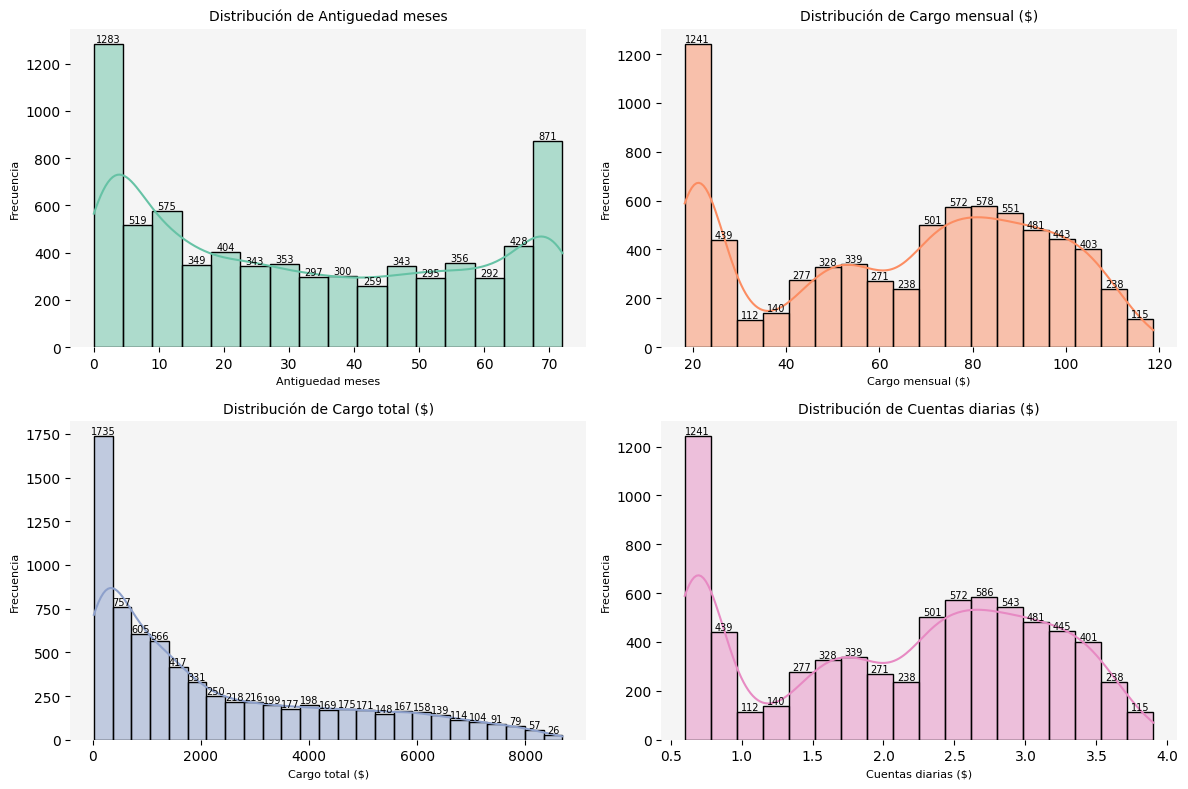

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['Cargo_total'] = pd.to_numeric(df['Cargo_total'], errors='coerce')
df['Cargo_mensual'] = pd.to_numeric(df['Cargo_mensual'], errors='coerce')
df['Antiguedad_meses'] = pd.to_numeric(df['Antiguedad_meses'], errors='coerce')
df['Cuentas_diarias'] = pd.to_numeric(df['Cuentas_diarias'], errors='coerce')

variables_numericas = ['Antiguedad_meses', 'Cargo_mensual', 'Cargo_total', 'Cuentas_diarias']

colores = sns.color_palette("Set2", len(variables_numericas))

variables_con_dinero = ['Cargo_mensual', 'Cargo_total', 'Cuentas_diarias']

n = len(variables_numericas)
ncols = 2
nrows = (n + 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(variables_numericas):

    hist = sns.histplot(
        data=df,
        x=col,
        kde=True,
        color=colores[i],
        ax=axes[i]
    )

    for patch in hist.patches:
        height = patch.get_height()
        if not np.isnan(height) and height > 0:
            x = patch.get_x() + patch.get_width() / 2
            y = height
            axes[i].text(x, y, int(height), ha='center', va='bottom', fontsize=7)

    etiqueta_x = col.replace("_", " ")
    if col in variables_con_dinero:
        etiqueta_x += " ($)"

    axes[i].set_title(f'Distribución de {etiqueta_x}', fontsize=10)
    axes[i].set_xlabel(etiqueta_x, fontsize=8)
    axes[i].set_ylabel('Frecuencia', fontsize=8)
    axes[i].grid(False)
    axes[i].set_facecolor('#f5f5f5')
    for spine in axes[i].spines.values():
        spine.set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Descripcion de las Columnas Categoricas

In [36]:
descripcion_Col_categorica = df[['Genero','Tiene_pareja', 'Tiene_dependientes',
  'Servicio_telefonico', 'Multiples_lineas_telefonicas','Servicio_internet',
'Seguridad_en_línea_Internet','Respaldo_en_línea_Internet', 'Proteccion_de_dispositivos_Internet',
'Soporte_tecnico_Internet', 'Streaming_TV_Internet','Streaming_peliculas_Internet',
'Tipo_de_contrato', 'Facturacion_on_line', 'Metodo_de_pago']].describe().T


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_multiple_categorical(df, columns, palettes=None, figsize=(5, 5), ncols=2):
    nplots = len(columns)
    nrows = (nplots + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    total = len(df)

    for i, col in enumerate(columns):
        ax = axes[i]
        palette = palettes[i] if palettes and i < len(palettes) else 'muted'
        sns.countplot(data=df, x=col, hue=col, palette=palette, legend=False, ax=ax)
        ax.set_facecolor('#f5f5f5')

        for p in ax.patches:
            altura = p.get_height()
            porcentaje = altura / total * 100
            texto = f'{altura}\n({porcentaje:.1f}%)'
            ax.annotate(
                texto,
                (p.get_x() + p.get_width() / 2., altura * 0.6),
                ha='center',
                va='center',
                color='black',
                fontsize=10
            )

        for label in ax.get_xticklabels():
            label.set_fontsize(8)
            if col == 'Metodo_de_pago':
                label.set_rotation(25)

        ax.set_title(f'Distribución de {col.replace("_", " ")}', fontsize=12)
        ax.set_xlabel(col.replace("_", " "), fontsize=10)
        ax.set_ylabel('Clientes', fontsize=10)
        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()


####  Descripcion de las Columnas Cliente_senior y Genero

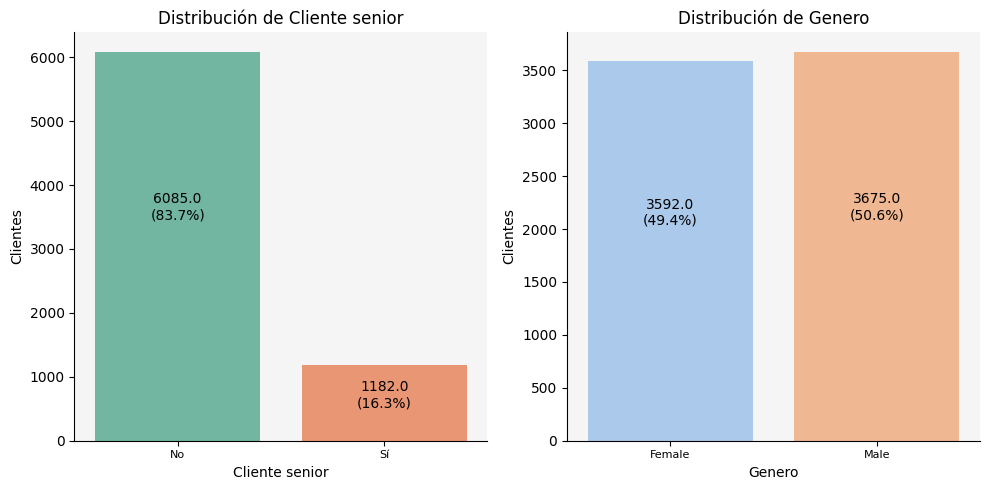

In [38]:
cols = ['Cliente_senior','Genero',]
palettes = ['Set2','pastel']

import matplotlib.ticker as ticker

plot_multiple_categorical(df, cols, palettes, figsize=(10,5), ncols=2)

fig = plt.gcf()
axes = fig.get_axes()

for i, col in enumerate(cols):
    valores_unicos = sorted(set(df[col].dropna().unique()))
    if valores_unicos == [0, 1]:
        if col == 'Genero':
            etiquetas = ['Female', 'Male']
        else:
            etiquetas = ['No', 'Sí']
        axes[i].xaxis.set_major_locator(ticker.FixedLocator(valores_unicos))
        axes[i].set_xticklabels(etiquetas)

plt.show()

### Metodo de Pago

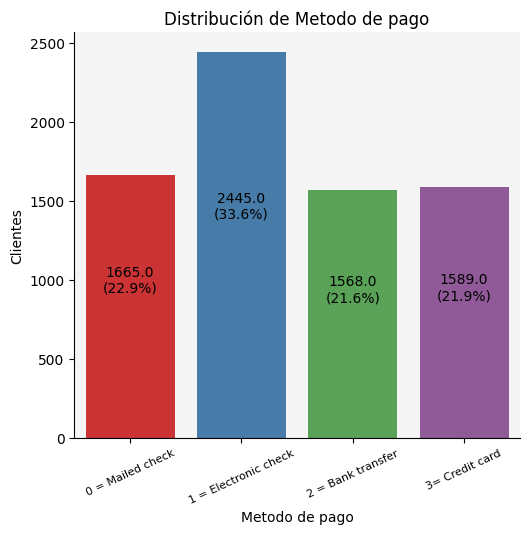

In [39]:
cols = ['Metodo_de_pago']
palettes = ['Set1']

import matplotlib.ticker as ticker

plot_multiple_categorical(df, cols, palettes, figsize=(10,5), ncols=2)
fig = plt.gcf()
axes = fig.get_axes()

for i, col in enumerate(cols):
    valores_unicos = sorted(set(df[col].dropna().unique()))
    etiquetas = []
    for v in valores_unicos:
        if v == 0:
            etiquetas.append('0 = Mailed check')
        elif v == 1:
            etiquetas.append('1 = Electronic check')
        elif v == 2:
            etiquetas.append('2 = Bank transfer')
        elif v == 3:
            etiquetas.append('3= Credit card')
        else:
            etiquetas.append(str(v))

    axes[i].set_xticks(valores_unicos)
    axes[i].set_xticklabels(etiquetas)

### Descripcion de Variables Tiene Pareja, Tiene Dependientes y Servicio Telefonico y Multiples lineas telefonicas

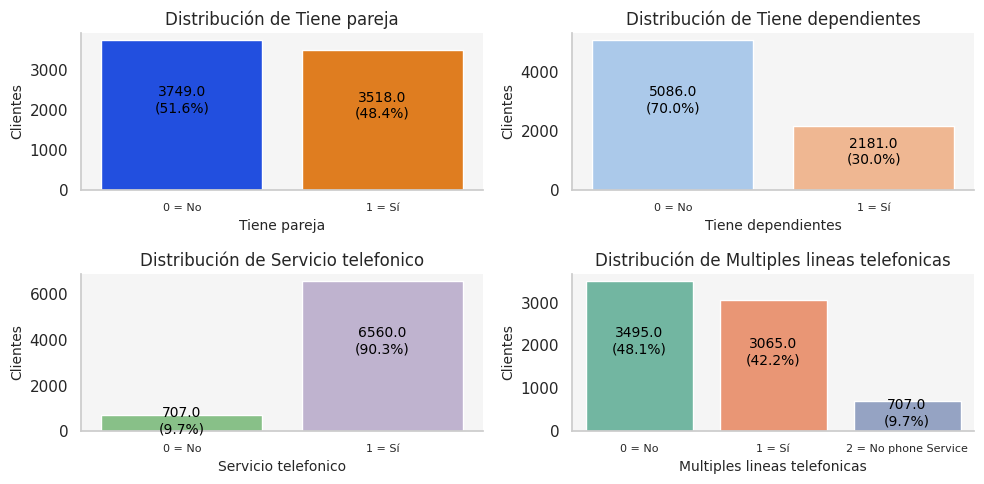

In [69]:
import matplotlib.ticker as ticker

cols = ['Tiene_pareja', 'Tiene_dependientes','Servicio_telefonico','Multiples_lineas_telefonicas']
palettes = ['bright', 'pastel', 'Accent', 'Set2']

plot_multiple_categorical(df, cols, palettes, figsize=(10,5), ncols=2)
fig = plt.gcf()
axes = fig.get_axes()

for i, col in enumerate(cols):
    valores_unicos = sorted(set(df[col].dropna().unique()))
    if valores_unicos == [0, 1]:
        etiquetas = ['0 = No', '1 = Sí']

        axes[i].xaxis.set_major_locator(ticker.FixedLocator(valores_unicos))
        axes[i].set_xticklabels(etiquetas)

    elif valores_unicos == [0, 1, 2]:
        etiquetas = ['0 = No', '1 = Sí', '2 = No phone Service']

        axes[i].xaxis.set_major_locator(ticker.FixedLocator(valores_unicos))
        axes[i].set_xticklabels(etiquetas)

plt.show()

Descripcion columnas Tipo de Contrato y Facturacion On line

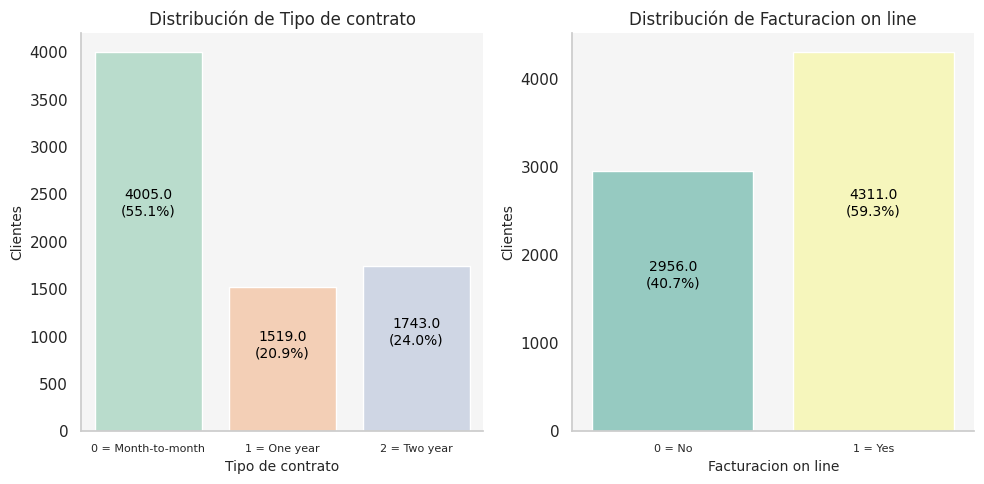

In [68]:
cols = ['Tipo_de_contrato', 'Facturacion_on_line']
palettes = ['Pastel2', 'Set3']

plot_multiple_categorical(df, cols, palettes, figsize=(10, 5), ncols=2)
fig = plt.gcf()
axes = fig.get_axes()

for i, col in enumerate(cols):
    valores_unicos = sorted(set(df[col].dropna().unique()))

    if col == 'Tipo_de_contrato':
        etiquetas = ['0 = Month-to-month', '1 = One year', '2 = Two year']
        ticks = [0, 1, 2]

    elif col == 'Facturacion_on_line':
        etiquetas = ['0 = No', '1 = Yes']
        ticks = [0, 1]

    else:
        continue

    axes[i].xaxis.set_major_locator(ticker.FixedLocator(ticks))
    axes[i].set_xticklabels(etiquetas)
plt.show()

###  Descripcion Variables Streaming TV Internet, Streaming peliculas Internet, Seguridad en linea Internet.

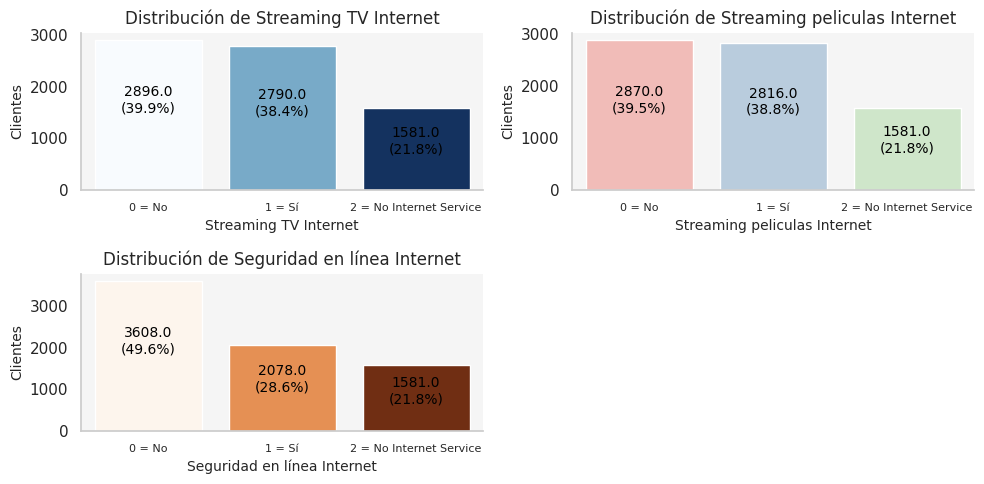

In [67]:
cols = ['Streaming_TV_Internet','Streaming_peliculas_Internet','Seguridad_en_línea_Internet']
palettes = ['Blues', 'Pastel1','Oranges']

plot_multiple_categorical(df, cols, palettes, figsize=(10,5), ncols=2)
fig = plt.gcf()
axes = fig.get_axes()

for i, col in enumerate(cols):
    valores_unicos = sorted(set(df[col].dropna().unique()))
    etiquetas = []
    for v in valores_unicos:
        if v == 0:
            etiquetas.append('0 = No')
        elif v == 1:
            etiquetas.append('1 = Sí')
        elif v == 2:
            etiquetas.append('2 = No Internet Service')
        else:
            etiquetas.append(str(v))

    axes[i].set_xticks(valores_unicos)
    axes[i].set_xticklabels(etiquetas)


 ### 4.2.4. Descripcion de variables  Servicio de Internet, Soporte Tecnico Internet, Proteccion dispositivos Internet y Respaldo en linea Internet.


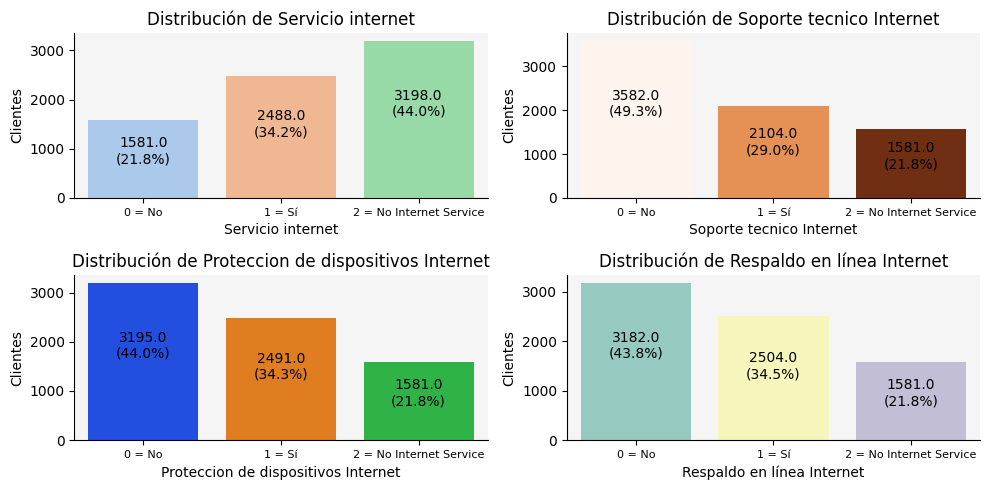

In [43]:
cols = ['Servicio_internet','Soporte_tecnico_Internet','Proteccion_de_dispositivos_Internet','Respaldo_en_línea_Internet']
palettes = ['pastel', 'Oranges', 'bright', 'Set3']

plot_multiple_categorical(df, cols, palettes, figsize=(10,5), ncols=2)
fig = plt.gcf()
axes = fig.get_axes()

for i, col in enumerate(cols):
    valores_unicos = sorted(set(df[col].dropna().unique()))
    etiquetas = []
    for v in valores_unicos:
        if v == 0:
            etiquetas.append('0 = No')
        elif v == 1:
            etiquetas.append('1 = Sí')
        elif v == 2:
            etiquetas.append('2 = No Internet Service')
        else:
            etiquetas.append(str(v))

    axes[i].set_xticks(valores_unicos)
    axes[i].set_xticklabels(etiquetas)

# 4. Visualizacion de la Evasion ( Churn ) ( Abandono_cliente)

En este punto  determinará cuales son las variables que influyen en el abandono de clientes (Churn)

A partir de ahora las columnas se identificaran como variables , ya que se debe determinar cual o cuales intervienen en el abandono de los clientes (churn)

### Proporcion de clientes que  abandonan y los que permanecen

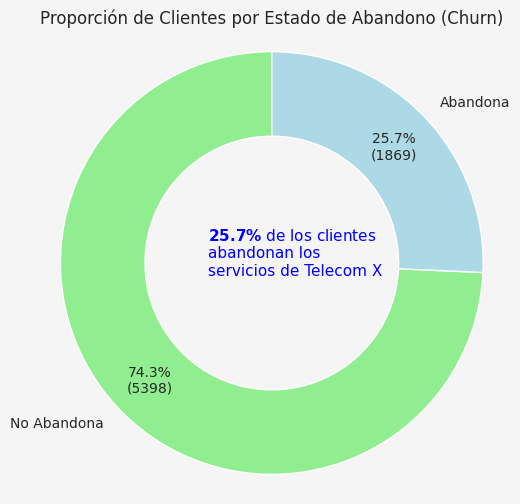

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

churn_counts = df['Abandono_cliente'].value_counts()
churn_percentages = df['Abandono_cliente'].value_counts(normalize=True) * 100
churn_rate = churn_percentages.get(1, 0)

churn_map = {0: 'No Abandona', 1: 'Abandona'}
labels_for_plot = [churn_map[idx] for idx in churn_counts.index]

def autopct_format_func(pct):
    total = sum(churn_counts)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({val})'

fig, ax = plt.subplots(figsize=(6, 6), facecolor='#f5f5f5')

wedges, texts, autotexts = ax.pie(
    x=churn_counts,
    labels=labels_for_plot,
    autopct=autopct_format_func,
    colors=['lightgreen', 'lightblue'],
    startangle=90,
    textprops={'fontsize': 10},
    wedgeprops={'width': 0.4}
)

for autotext, wedge in zip(autotexts, wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2.0
    x = np.cos(np.deg2rad(angle)) * 0.8
    y = np.sin(np.deg2rad(angle)) * 0.8
    autotext.set_position((x, y))

texto = (
    "$\\bf{" + f"{churn_rate:.1f}" + "\\%}$ de los clientes\n"
    "abandonan los\n"
    "servicios de Telecom X"
)
ax.text(-0.3, 0.05, texto, ha='left', va='center', fontsize=11, color='blue')

plt.title('Proporción de Clientes por Estado de Abandono (Churn)', fontsize=12)
plt.axis('equal')
plt.show()

###  Analisis de Variables  Numericas.

In [45]:
#Descripcion estadistica de Columnas Numericas

descripcion_Col_numerica = df[['Antiguedad_meses',
       'Cargo_mensual', 'Cargo_total', 'Cuentas_diarias']].describe().T
descripcion_Col_numerica

,count,mean,std,min,25%,50%,75%,max
Antiguedad_meses,7267.0,32.346498,24.571773,0.00000,9.000000,29.000000,55.00000,72.000000
Cargo_mensual,7267.0,64.720098,30.129572,18.25000,35.425000,70.300000,89.87500,118.750000
Cargo_total,7267.0,2279.287581,2267.178963,18.80000,401.400000,1391.000000,3778.52500,8684.800000
Cuentas_diarias,7267.0,2.126153,0.989802,0.59954,1.163765,2.309461,2.95253,3.901117


5.2.1.Descripcion Estadistica de Variables

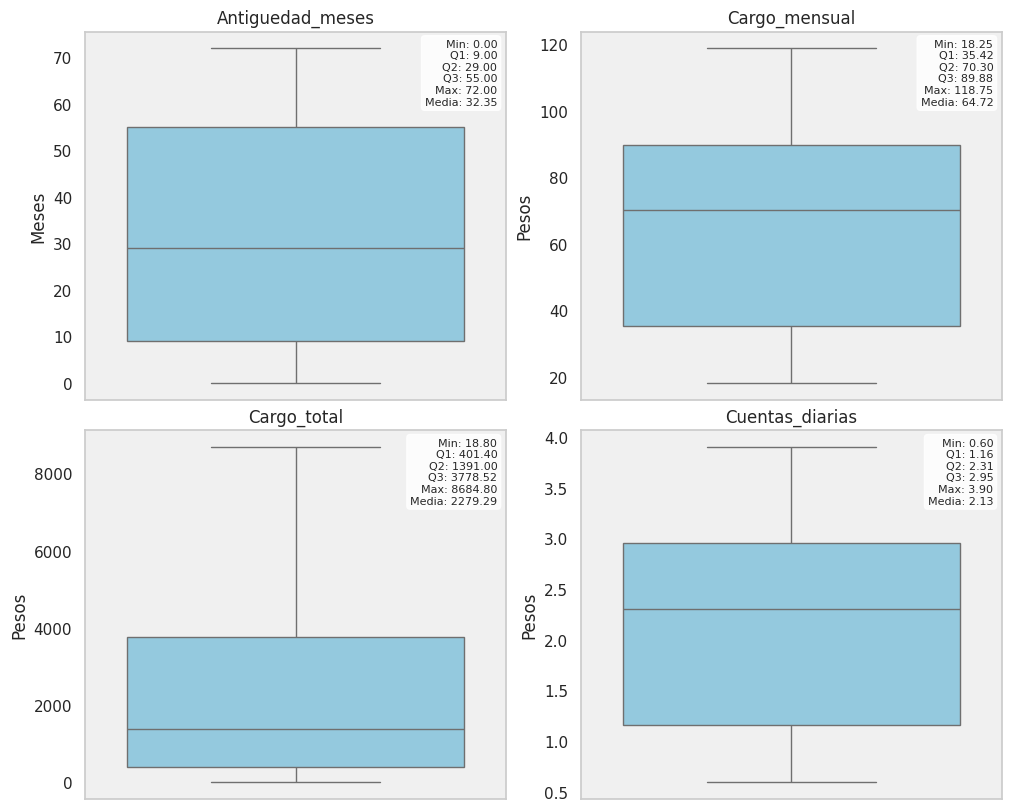

In [62]:

import seaborn as sns
import matplotlib.pyplot as plt

columnas = ['Antiguedad_meses', 'Cargo_mensual', 'Cargo_total', 'Cuentas_diarias']

etiquetas_y = {
    'Antiguedad_meses': 'Meses',
    'Cargo_mensual': 'Pesos',
    'Cargo_total': 'Pesos',
    'Cuentas_diarias': 'Pesos'
}
fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(columnas):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')  # Cambio aquí
    axes[i].set_title(col)
    axes[i].set_ylabel(etiquetas_y[col])
    axes[i].grid(False)

    axes[i].set_facecolor('#f0f0f0')

    stats = df[col].describe()
    texto = (
        f"Min: {stats['min']:.2f}\n"
        f"Q1: {stats['25%']:.2f}\n"
        f"Q2: {stats['50%']:.2f}\n"
        f"Q3: {stats['75%']:.2f}\n"
        f"Max: {stats['max']:.2f}\n"
        f"Media: {stats['mean']:.2f}"
    )

    axes[i].text(
        0.98, 0.98, texto,
        ha='right', va='top',
        transform=axes[i].transAxes,
        fontsize=8,
        bbox=dict(facecolor='white', alpha=0.85, boxstyle='round')
    )

plt.show()

###  Analisis de Correlacion para todas las variables.

La matriz de correlación es una herramienta estadística que muestra la fuerza y dirección de la relación lineal entre variables numéricas.

Cada celda en la matriz representa el coeficiente de correlación de Pearson entre dos variables. Este coeficiente varía entre:0 y 1.0. Donde 0.0 no existe correlacion y 1.0 hay una correlacion perfecta positiva, es decir hay una incidencia de esta variable en la variable en estudio.

Se usará esta herramienta estadistica para determinar cual es la variable que mas incide en el abandono de clientes (Churn).

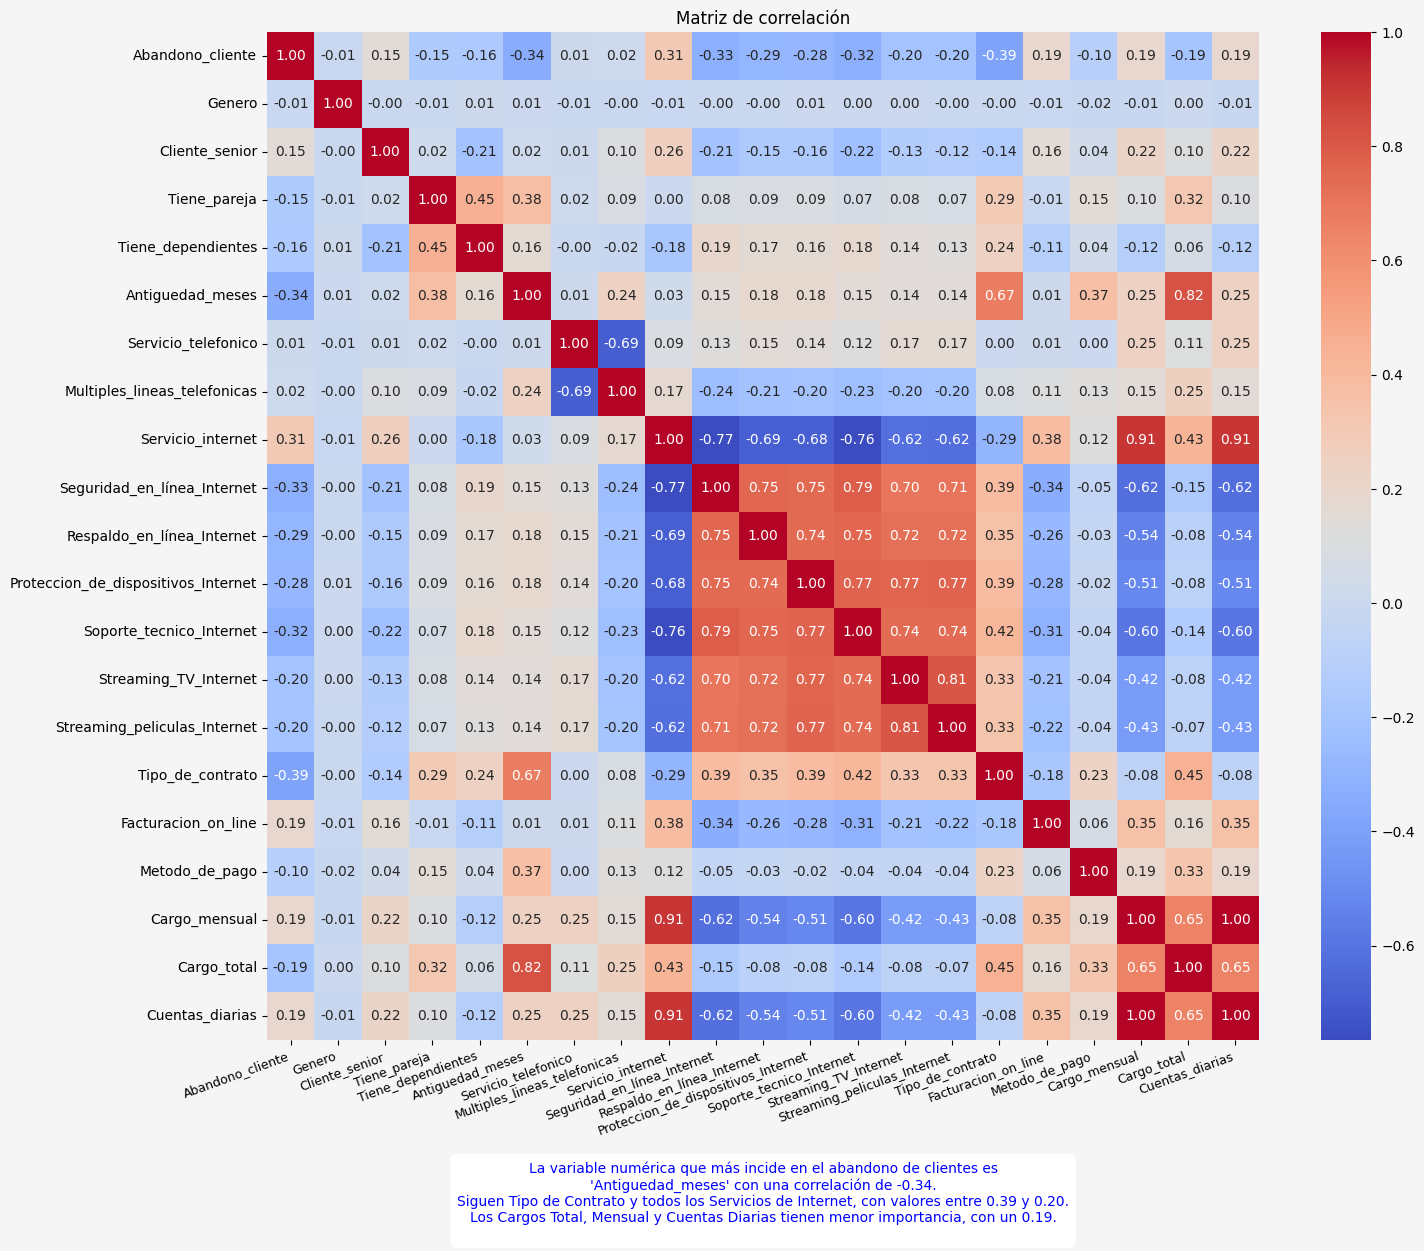

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Abandono_cliente'] = df['Abandono_cliente'].astype(int)

variables = ['Abandono_cliente', 'Genero', 'Cliente_senior', 'Tiene_pareja',
       'Tiene_dependientes', 'Antiguedad_meses', 'Servicio_telefonico',
       'Multiples_lineas_telefonicas', 'Servicio_internet',
       'Seguridad_en_línea_Internet', 'Respaldo_en_línea_Internet',
       'Proteccion_de_dispositivos_Internet', 'Soporte_tecnico_Internet',
       'Streaming_TV_Internet', 'Streaming_peliculas_Internet',
       'Tipo_de_contrato', 'Facturacion_on_line', 'Metodo_de_pago',
       'Cargo_mensual', 'Cargo_total', 'Cuentas_diarias']
correlaciones = df[variables].corr()

plt.figure(figsize=(16, 16))
ax = sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
ax.set_facecolor('#f5f5f5')
plt.gca().set_facecolor('#f5f5f5')
plt.gcf().set_facecolor('#f5f5f5')
plt.xticks(rotation=20, ha='right', fontsize=9)
plt.title("Matriz de correlación")

plt.subplots_adjust(bottom=0.25)

plt.text(
    0.5, -0.12,
    (
        "La variable numérica que más incide en el abandono de clientes es\n"
        "'Antiguedad_meses' con una correlación de -0.34.\n"
         "Siguen Tipo de Contrato y todos los Servicios de Internet, con valores entre 0.39 y 0.20.\n"
        "Los Cargos Total, Mensual y Cuentas Diarias tienen menor importancia, con un 0.19.\n"
    ),
    ha='center', va='top',
    fontsize=10, color='blue',
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'),
    transform=plt.gca().transAxes
)
plt.show()

# Relacion entre Variables y Abandono_cliente ( Churn).

###  Antiguedad del cliente y abandono de clientes (Churn).

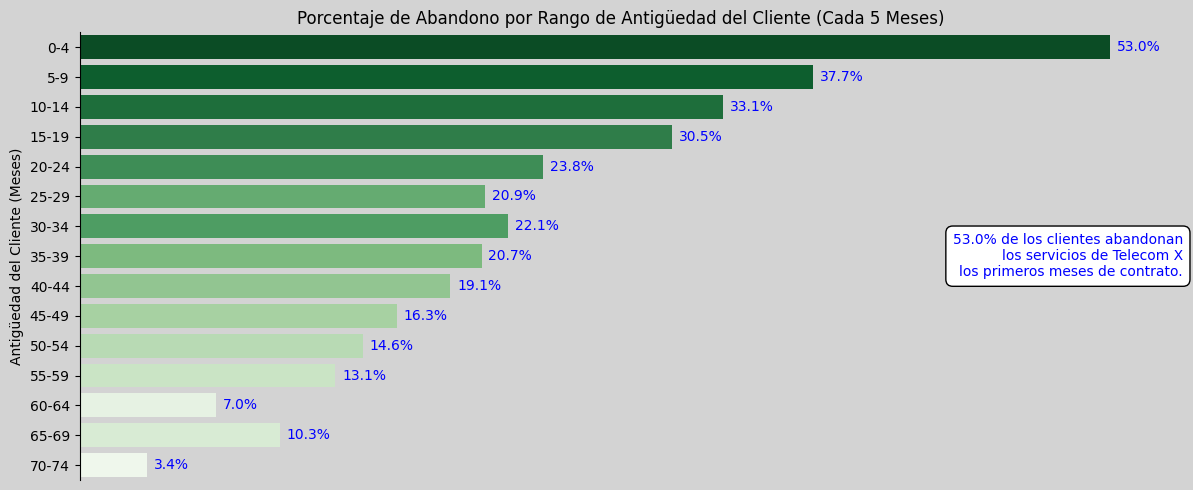

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

bins = np.arange(0, df['Antiguedad_meses'].max() + 6, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

df['Antiguedad_meses_rango'] = pd.cut(
    df['Antiguedad_meses'], bins=bins, labels=labels, right=False, include_lowest=True)

churn_counts = pd.crosstab(df['Antiguedad_meses_rango'], df['Abandono_cliente'])
churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
percentage_churned = churn_percentages[1].sort_values(ascending=False)

colors = sns.color_palette("Greens", len(percentage_churned))[::-1]
paleta = {index: colors[i] for i, index in enumerate(percentage_churned.index)}

fig, ax = plt.subplots(figsize=(12, 5), facecolor='lightgrey')
ax.set_facecolor('lightgrey')

sns.barplot(
    x=percentage_churned.values,
    y=percentage_churned.index,
    hue=percentage_churned.index,
    palette=paleta,
    dodge=False,
    legend=False
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('Antigüedad del Cliente (Meses)', fontsize=10)
ax.set_title('Porcentaje de Abandono por Rango de Antigüedad del Cliente (Cada 5 Meses)', fontsize=12)
ax.set_xticks([])

for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}%',
                xy=(p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left', va='center',
                fontsize=10,
                color='blue')

ax.text(1.02, 0.5,
        '53.0% de los clientes abandonan\nlos servicios de Telecom X\n'
        'los primeros meses de contrato.',
        transform=ax.transAxes,
        fontsize=10,
        color='blue',
        ha='right',
        va='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

### Cargo Mensual, Cargo Total y Cuentas Diarias con  Abandono de Clientes (churn).

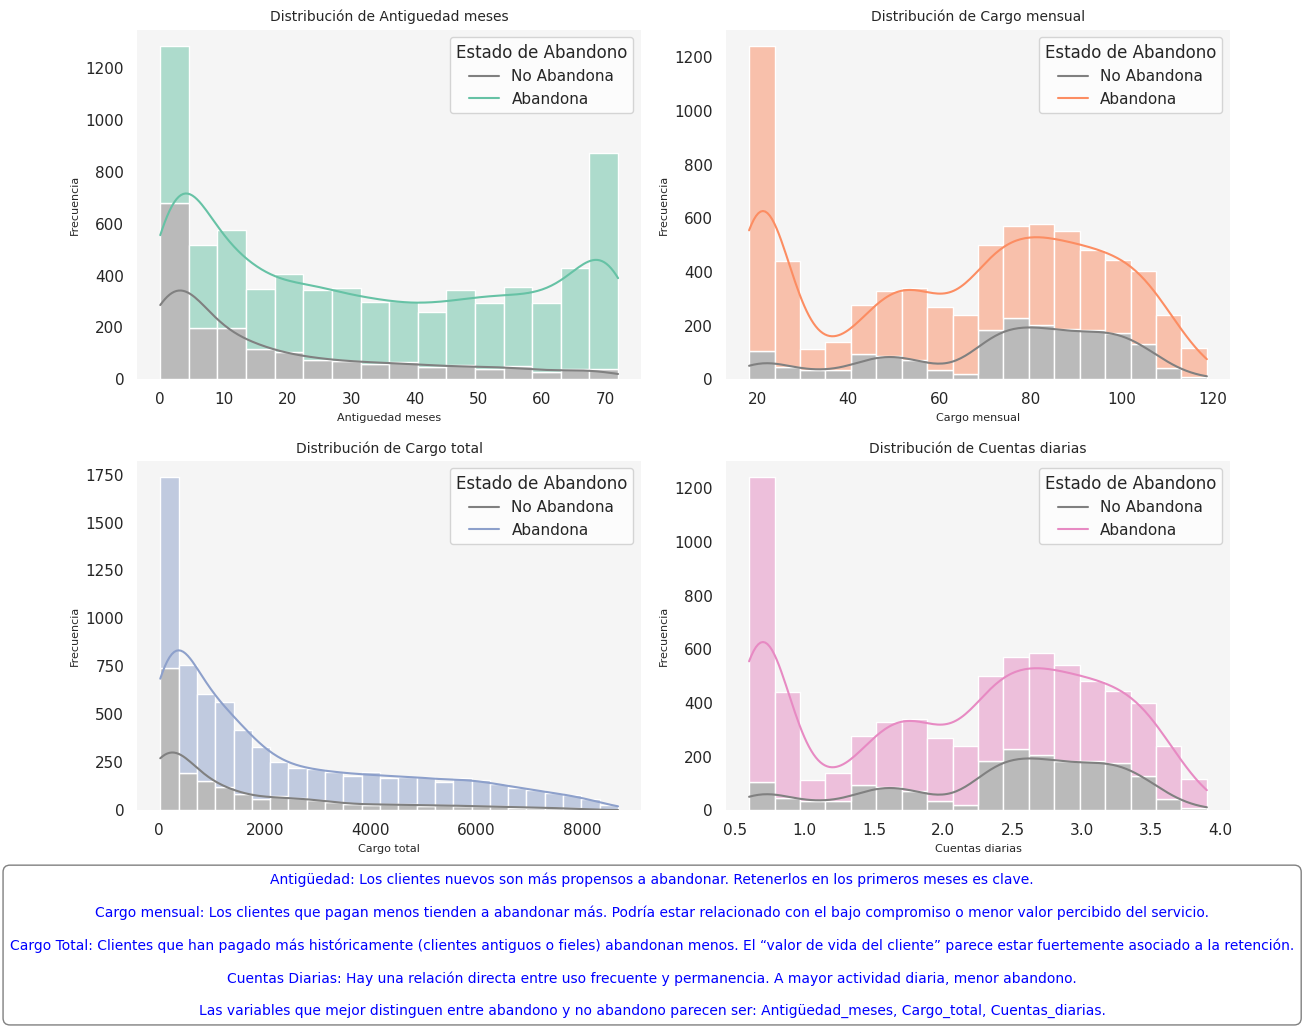

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegurar tipo numérico
df['Cargo_total'] = pd.to_numeric(df['Cargo_total'], errors='coerce')
df['Cargo_mensual'] = pd.to_numeric(df['Cargo_mensual'], errors='coerce')
df['Antiguedad_meses'] = pd.to_numeric(df['Antiguedad_meses'], errors='coerce')
df['Cuentas_diarias'] = pd.to_numeric(df['Cuentas_diarias'], errors='coerce')

variables_numericas = ['Antiguedad_meses', 'Cargo_mensual', 'Cargo_total', 'Cuentas_diarias']

colores = sns.color_palette("Set2", len(variables_numericas))
paletas = [[color, 'gray'] for color in colores]
n = len(variables_numericas)
ncols = 2
nrows = (n + 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(variables_numericas):
    sns.histplot(
        data=df,
        x=col,
        hue='Abandono_cliente',
        multiple='stack',
        kde=True,
        palette=paletas[i],
        ax=axes[i]
    )
    legend = axes[i].legend(title='Estado de Abandono', labels=['No Abandona', 'Abandona'])
    if legend:
        legend.set_title('Estado de Abandono', prop={'size': 8})
        for text in legend.get_texts():
            text.set_fontsize(8)

    axes[i].set_title(f'Distribución de {col.replace("_", " ")}', fontsize=10)
    axes[i].set_xlabel(col.replace("_", " "), fontsize=8)
    axes[i].set_ylabel('Frecuencia', fontsize=8)
    axes[i].legend(title='Estado de Abandono', labels=['No Abandona', 'Abandona'])
    axes[i].grid(False)
    axes[i].set_facecolor('#f5f5f5')

    for spine in axes[i].spines.values():
        spine.set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

texto = (
    "Antigüedad: Los clientes nuevos son más propensos a abandonar. Retenerlos en los primeros meses es clave.\n\n"
    "Cargo mensual: Los clientes que pagan menos tienden a abandonar más. Podría estar relacionado con el bajo compromiso o menor valor percibido del servicio.\n\n"
    "Cargo Total: Clientes que han pagado más históricamente (clientes antiguos o fieles) abandonan menos. El “valor de vida del cliente” parece estar fuertemente asociado a la retención.\n\n"
    "Cuentas Diarias: Hay una relación directa entre uso frecuente y permanencia. A mayor actividad diaria, menor abandono.\n\n"
    "Las variables que mejor distinguen entre abandono y no abandono parecen ser: Antigüedad_meses, Cargo_total, Cuentas_diarias."
)

fig.text(
    0.5, 0.12, texto,
    ha='center',
    va='top',
    fontsize=10,
    color='blue',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.tight_layout(rect=[0, 0.12, 1, 1])
plt.show()

### Tipo de Contrato y Abandonono_clientes (Churn).

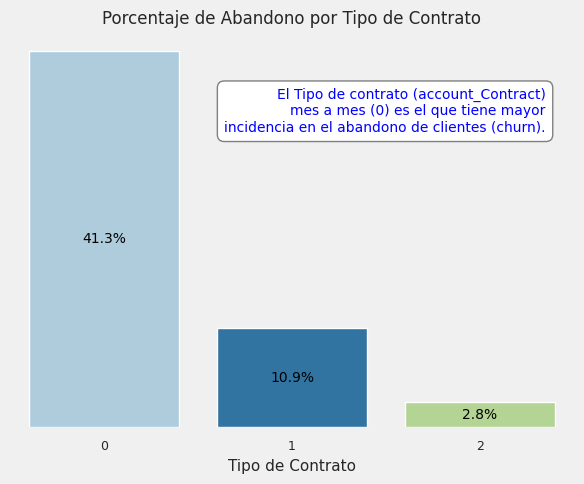

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_payment_counts = pd.crosstab(df['Tipo_de_contrato'], df['Abandono_cliente'])
churn_payment_percentages = churn_payment_counts.div(churn_payment_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(6, 5), facecolor='#f0f0f0')
sns.barplot(
    x=churn_payment_percentages.index,
    y=churn_payment_percentages[1],
    hue=churn_payment_percentages.index,
    palette='Paired',
    legend=False,
    ax=ax
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=10)

ax.set_title('Porcentaje de Abandono por Tipo de Contrato', fontsize=12)
ax.set_xlabel('Tipo de Contrato', fontsize=11)
ax.set_ylabel('')
ax.set_yticks([])
ax.set_yticklabels([])

ax.set_facecolor('#f0f0f0')
fig.patch.set_facecolor('#f0f0f0')
ax.tick_params(axis='y', left=False)
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
ax.grid(False)

plt.xticks(ha='center', fontsize=9)
texto = (
    "El Tipo de contrato (account_Contract)\n"
    "mes a mes (0) es el que tiene mayor\n"
    "incidencia en el abandono de clientes (churn)."
)
ax.text(
    0.95, 0.8, texto,
    transform=ax.transAxes,
    fontsize=10,
    color='blue',
    ha='right', va='center',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.tight_layout()
plt.show()

### Servicios de Internet y Abandono de Clientes (Churn)

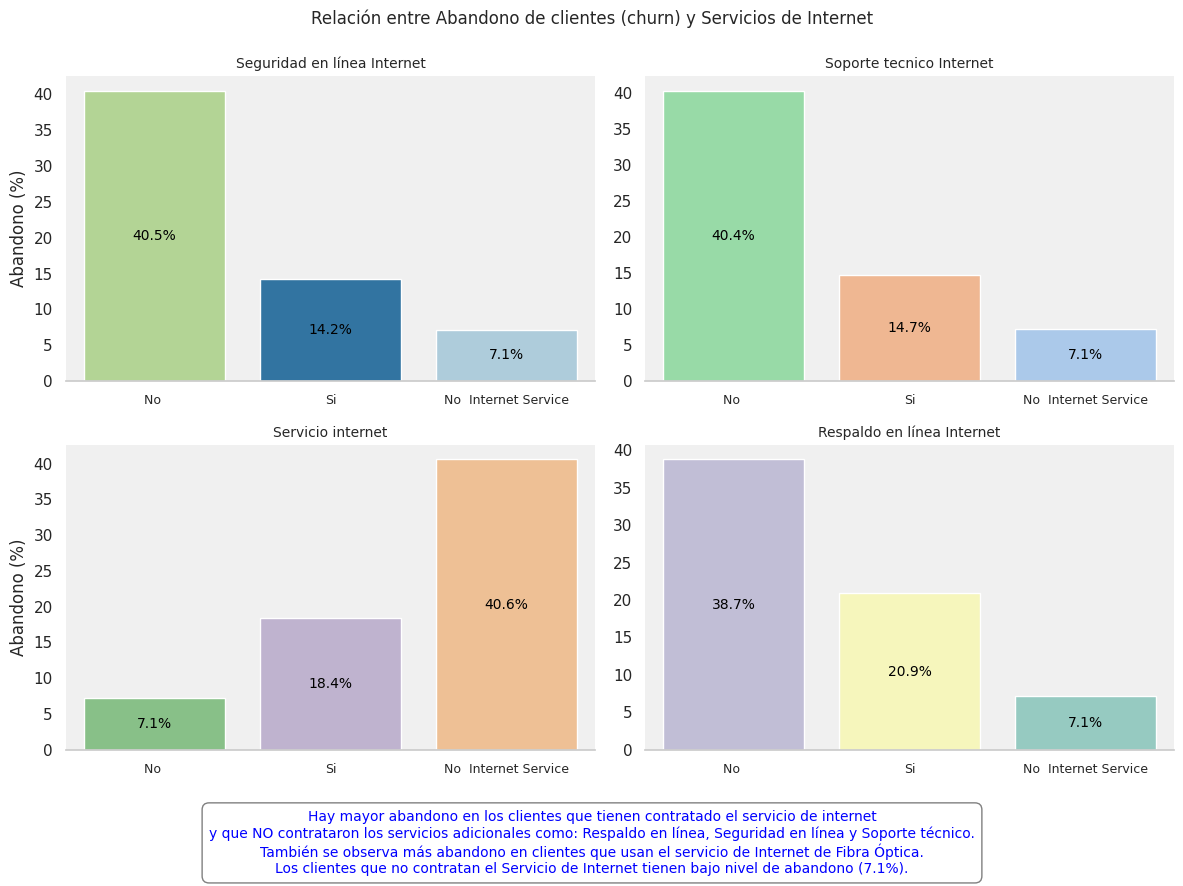

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

cols = [
    'Seguridad_en_línea_Internet',
    'Soporte_tecnico_Internet',
    'Servicio_internet',
    'Respaldo_en_línea_Internet'
]
paletas = ['Paired', 'pastel', 'Accent', 'Set3']

etiquetas_personalizadas = {
    '0': 'No ',
    '1': 'Si',
    '2': 'No  Internet Service',
    'No internet service': 'Sin Internet',
    'No phone service': 'Sin Teléfono'
}

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    counts = pd.crosstab(df[col], df['Abandono_cliente'])
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    idx_str = percentages.index.astype(str)

    n = len(percentages[1])
    cmap = sns.color_palette(paletas[i], n)
    sorted_indices = np.argsort(percentages[1].values)
    color_map = [None] * n
    for rank, idx in enumerate(sorted_indices):
        color_map[idx] = cmap[rank]

    ax = axes[i]
    bars = sns.barplot(
        x=idx_str,
        y=percentages[1],
        hue=idx_str,
        palette=color_map,
        ax=ax,
        legend=False
    )

    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=10)

    ax.set_title(col.replace('_', ' '), fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Abandono (%)' if i % 2 == 0 else '')
    xtick_locs = ax.get_xticks()
    xtick_labels = [label.get_text() for label in ax.get_xticklabels()]

    ax.set_xticks(xtick_locs)
    ax.set_xticklabels(
        [etiquetas_personalizadas.get(etiqueta, etiqueta) for etiqueta in xtick_labels],
        fontsize=9,
        ha='center'
    )

    ax.set_facecolor('#f0f0f0')
    ax.tick_params(axis='x', labelsize=9)

    sns.despine(ax=ax, top=True, right=True, left=True)
    ax.grid(False)

fig.suptitle('Relación entre Abandono de clientes (churn) y Servicios de Internet', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.99])

texto = (
    "Hay mayor abandono en los clientes que tienen contratado el servicio de internet\n"
    "y que NO contrataron los servicios adicionales como: Respaldo en línea, Seguridad en línea y Soporte técnico.\n"
    "También se observa más abandono en clientes que usan el servicio de Internet de Fibra Óptica.\n"
    "Los clientes que no contratan el Servicio de Internet tienen bajo nivel de abandono (7.1%)."
)
fig.text(
    0.5, -0.02, texto,
    ha='center', va='top',
    fontsize=10,
    color='blue',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.show()

###  Streaming Tv Internet y Streaming Peliculas Internet y Abandono de clientes (Churn).

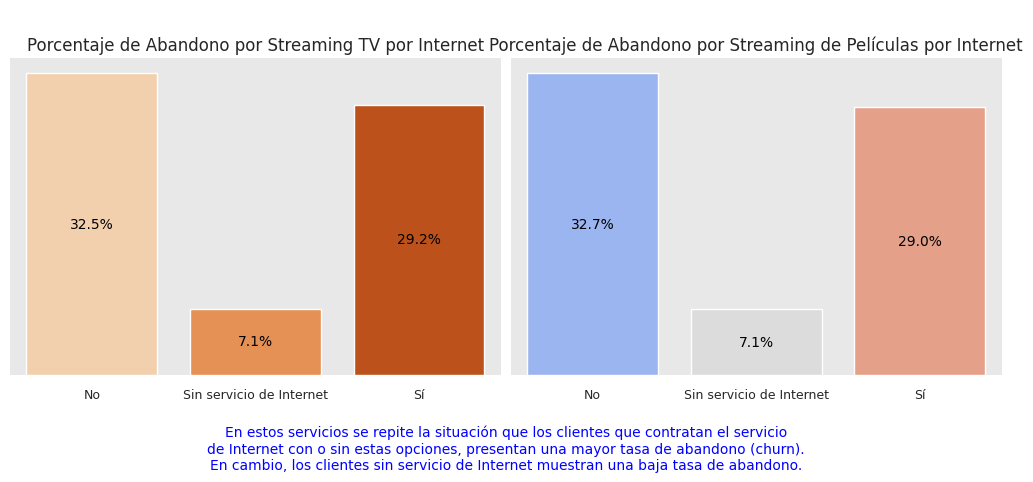

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


etiquetas_personalizadas = {'0': 'No', '1': 'Sí', '2': 'Sin servicio de Internet'}

df['Streaming_TV_Internet_etiqueta'] = df['Streaming_TV_Internet'].astype(str).replace(etiquetas_personalizadas)
df['Streaming_peliculas_Internet_etiqueta'] = df['Streaming_peliculas_Internet'].astype(str).replace(etiquetas_personalizadas)

cols = ['Streaming_TV_Internet_etiqueta', 'Streaming_peliculas_Internet_etiqueta']
titulos = ['Streaming TV por Internet', 'Streaming de Películas por Internet']
paletas = ['Oranges', 'coolwarm']

fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

for i, col in enumerate(cols):
    churn_counts = pd.crosstab(df[col], df['Abandono_cliente'])
    churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

    ax = axes[i]
    bars = sns.barplot(
        x=churn_percentages.index,
        y=churn_percentages[1],
        hue=churn_percentages.index,
        palette=paletas[i],
        legend=False,
        ax=ax
    )

    for container in bars.containers:
        bars.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=10)

    ax.set_title(f'Porcentaje de Abandono por {titulos[i]}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Porcentaje de Clientes que Abandonan (%)', fontsize=10)
    plt.setp(ax.get_xticklabels(), ha='center', fontsize=9)

    ax.set_facecolor('#e8e8e8')
    ax.grid(False)
    ax.yaxis.set_visible(False)
    for spine in ax.spines.values():
        spine.set_visible(False)

texto = (
    "En estos servicios se repite la situación que los clientes que contratan el servicio\n"
    "de Internet con o sin estas opciones, presentan una mayor tasa de abandono (churn).\n"
    "En cambio, los clientes sin servicio de Internet muestran una baja tasa de abandono."
)

fig.suptitle(' ', fontsize=12)
fig.text(0.5, -0.05, texto, ha='center', va='top', fontsize=10, color='blue',
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))

plt.show()

###  Metodo de Pago (account_PaymentMethod) y Abandono (Churn)

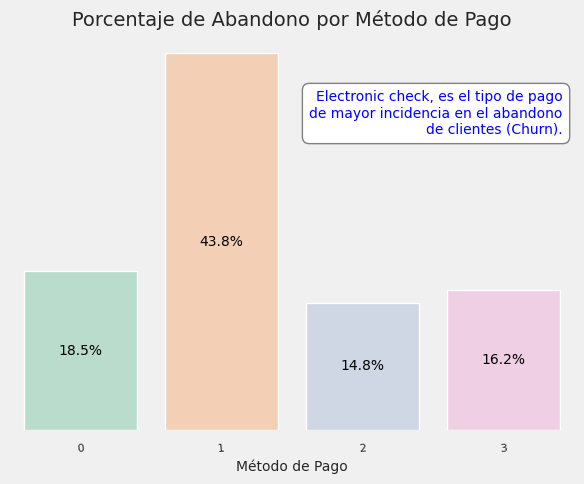

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

churn_payment_counts = pd.crosstab(df['Metodo_de_pago'], df['Abandono_cliente'])
churn_payment_percentages = churn_payment_counts.div(churn_payment_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(6, 5), facecolor='#f0f0f0')
sns.barplot(
    x=churn_payment_percentages.index,
    y=churn_payment_percentages[1],
    hue=churn_payment_percentages.index,
    palette='Pastel2',
    legend=False,
    ax=ax
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=10)

ax.set_title('Porcentaje de Abandono por Método de Pago', fontsize=14)
ax.set_xlabel('Método de Pago', fontsize=10)
ax.set_ylabel('')
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_facecolor('#f0f0f0')
fig.patch.set_facecolor('#f0f0f0')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
ax.grid(False)
plt.xticks(rotation=5, ha='center', fontsize=8)

texto = (
    "Electronic check, es el tipo de pago\n"
    "de mayor incidencia en el abandono\n"
    "de clientes (Churn)."
)
ax.text(
    0.98, 0.8, texto,
    transform=ax.transAxes,
    fontsize=10,
    color='blue',
    ha='right', va='center',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.tight_layout()
plt.show()

## Regresion Logistica para Variables Numericas

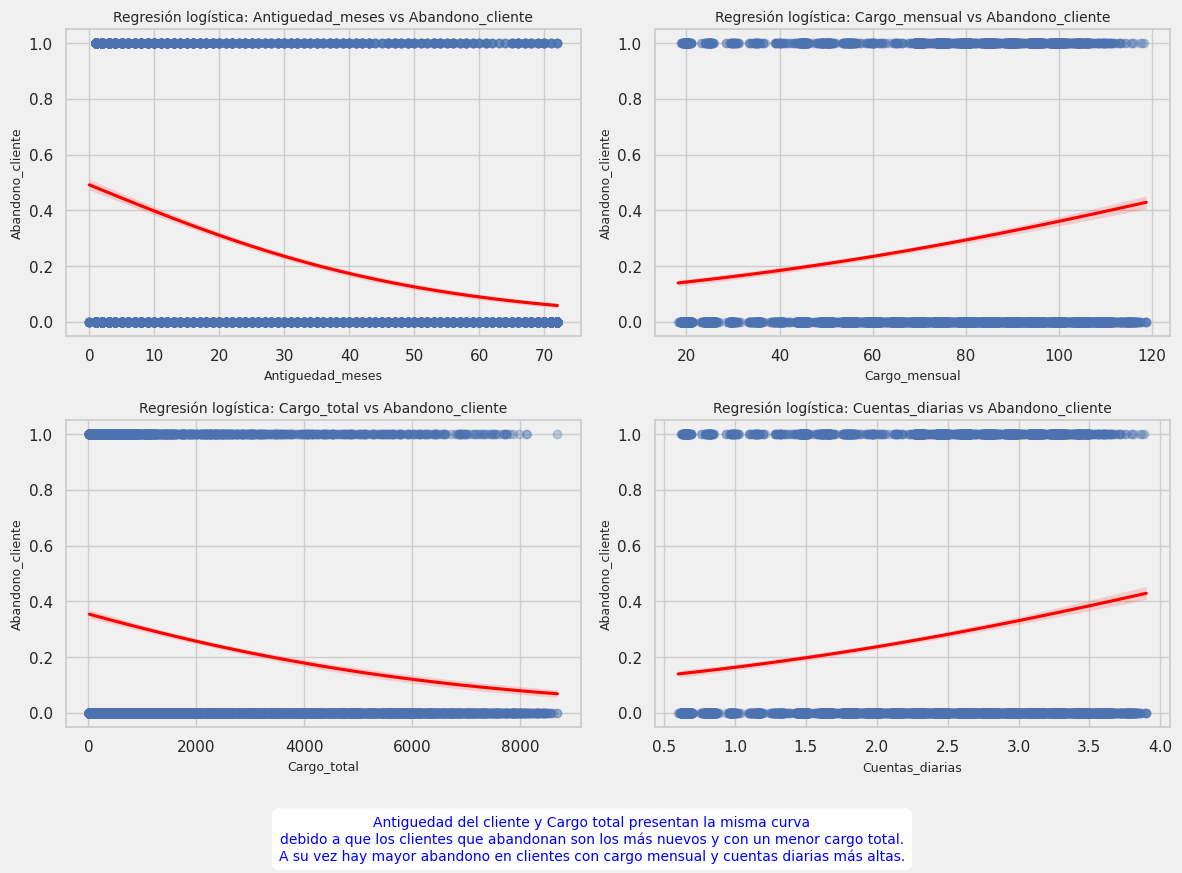

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
variables_numericas = ['Antiguedad_meses', 'Cargo_mensual', 'Cargo_total', 'Cuentas_diarias']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
fig.patch.set_facecolor('#f0f0f0')

texto = (
    "Antiguedad del cliente y Cargo total presentan la misma curva\n"
    "debido a que los clientes que abandonan son los más nuevos y con un menor cargo total.\n"
    "A su vez hay mayor abandono en clientes con cargo mensual y cuentas diarias más altas."
)

fig.text(
    0.5, -0.03,
    texto,
    ha='center', va='top',
    fontsize=10,
    color='blue',
    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5')
)

for i, var in enumerate(variables_numericas):
    sns.regplot(x=var, y='Abandono_cliente', data=df,
                logistic=True,
                scatter_kws={'alpha': 0.3},
                line_kws={'color': 'red'},
                ax=axes[i])
    axes[i].set_title(f"Regresión logística: {var} vs Abandono_cliente", fontsize=10)
    axes[i].set_xlabel(var, fontsize=9)
    axes[i].set_ylabel('Abandono_cliente', fontsize=9)

    axes[i].set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

## 5. Caracterizacion de clientes con antiguedad entre 0 a 9 meses que presentan mayor abandono.

### Variable Antiguedad_meses.

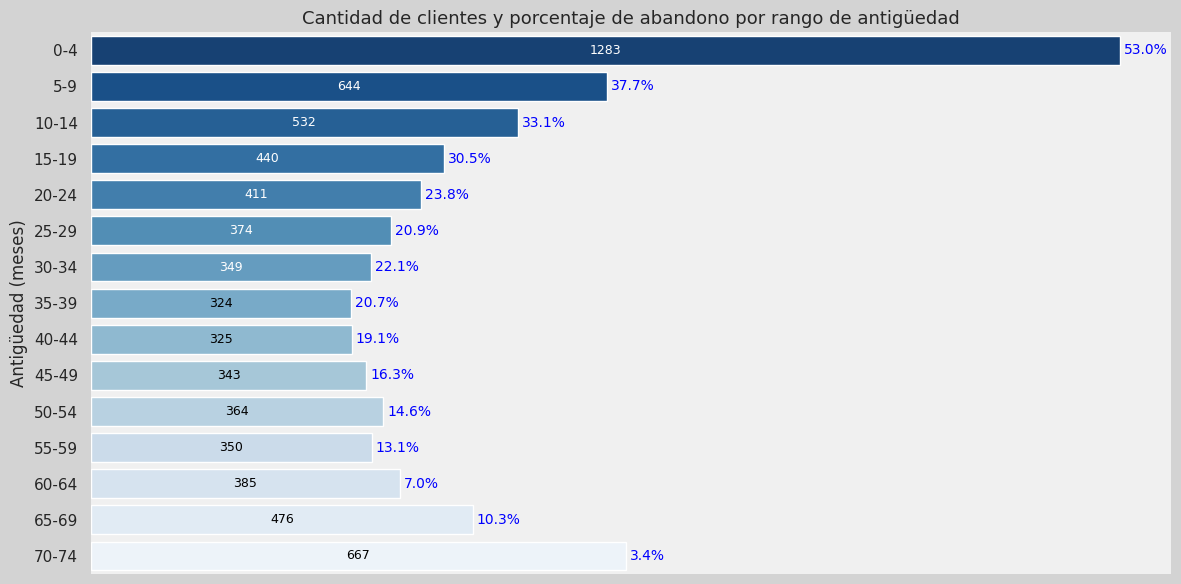

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

bins = np.arange(0, df['Antiguedad_meses'].max() + 6, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

df['Rango_antiguedad'] = pd.cut(df['Antiguedad_meses'], bins=bins, labels=labels, right=False, include_lowest=True)
conteos = df['Rango_antiguedad'].value_counts().reindex(labels, fill_value=0)

churn_counts = pd.crosstab(df['Rango_antiguedad'], df['Abandono_cliente'])
churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
percentage_churned = churn_percentages[1].reindex(labels, fill_value=0)

colors = sns.color_palette("Blues", len(conteos))[::-1]
fig, ax = plt.subplots(figsize=(12, 6), facecolor='lightgrey')
ax.set_facecolor('#f0f0f0')

sns.barplot(
    y=conteos.index,
    x=conteos.values,
    hue=conteos.index,
    palette=colors,
    dodge=False,
    orient='h',
    legend=False,
    ax=ax
)

for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    ax.annotate(f'{int(width)}',
                xy=(width / 2, bar.get_y() + bar.get_height() / 2),
                ha='center', va='center',
                fontsize=9,
                color='white' if i < len(colors)//2 else 'black')

for i, bar in enumerate(ax.patches):
    percent = percentage_churned.iloc[i]
    ax.annotate(f'{percent:.1f}%',
                xy=(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2),
                ha='left', va='center',
                fontsize=10,
                color='blue')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)

ax.set_title("Cantidad de clientes y porcentaje de abandono por rango de antigüedad", fontsize=13)
ax.set_ylabel("Antigüedad (meses)")
ax.set_xlabel("")

plt.tight_layout()
plt.show()

### Caracterizacion de los clientes del rango 0 a 9 meses de antiguedad.

#### Calculo de clientes  rango 0 a 9 meses.

In [82]:
bins = np.arange(0, df['Antiguedad_meses'].max() + 6, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df['Rango_antiguedad'] = pd.cut(df['Antiguedad_meses'], bins=bins, labels=labels, right=False)

tabla_abandono = pd.crosstab(df['Rango_antiguedad'], df['Abandono_cliente'])
primeros_rangos = tabla_abandono.loc[['0-4', '5-9']]

total_abandonos = primeros_rangos[1].sum()
total_clientes = primeros_rangos.sum().sum()
porcentaje_abandono = (total_abandonos / total_clientes) * 100

print(f"Total de abandonos (0-9 meses): {total_abandonos}")
print(f"Total de clientes (0-9 meses): {total_clientes}")
print(f"Porcentaje de abandono (0-9 meses): {porcentaje_abandono:.2f}%")

Total de abandonos (0-9 meses): 923
Total de clientes (0-9 meses): 1927
Porcentaje de abandono (0-9 meses): 47.90%


Número de clientes con antigüedad entre 0 y 9 meses: 1927



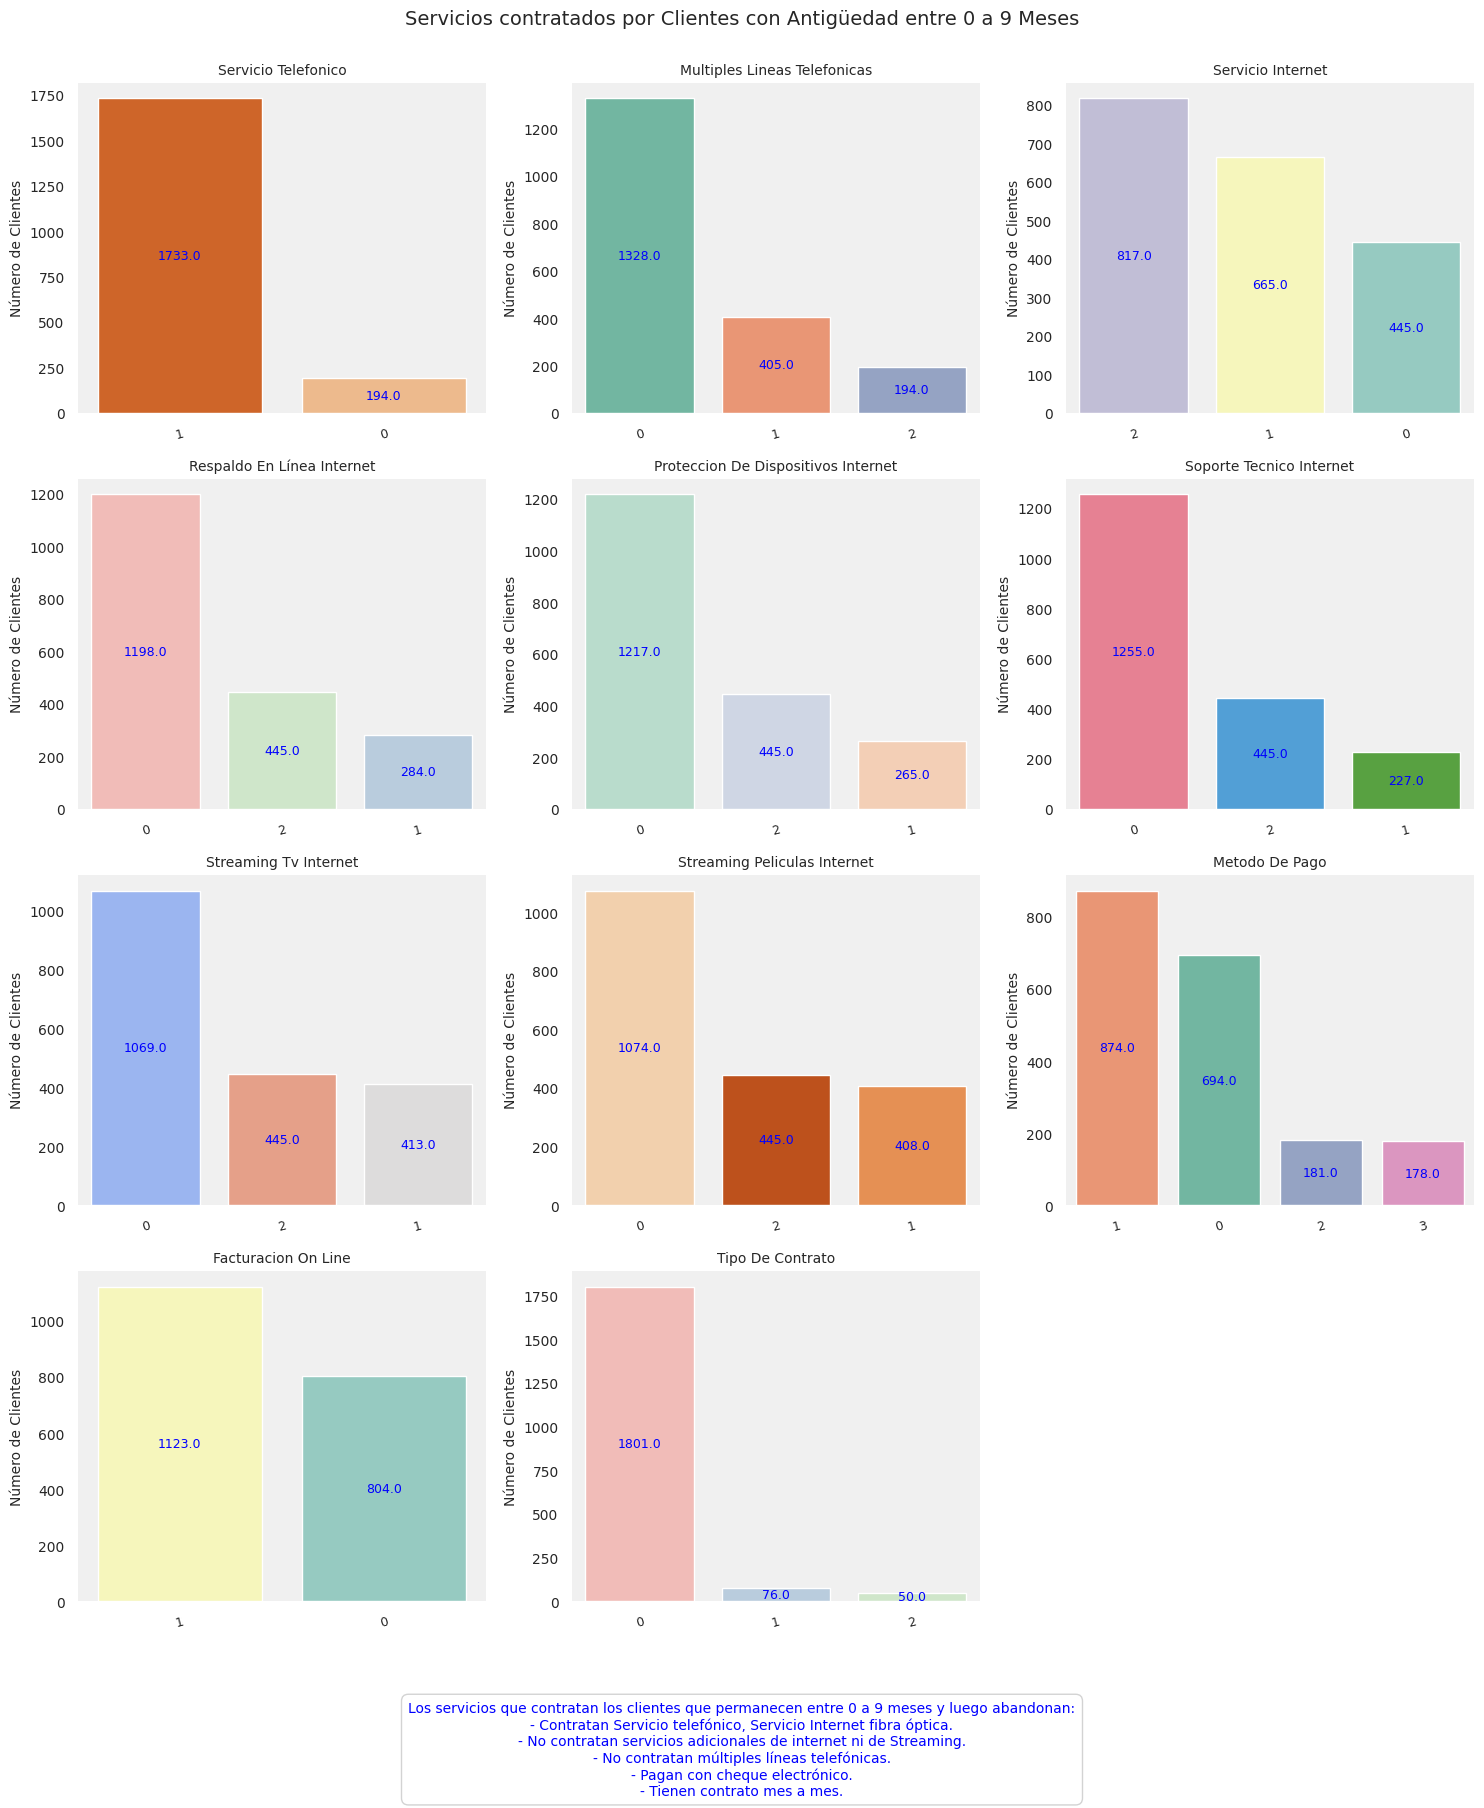

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

paletas = ["Oranges", "Set2", "Set3", "Pastel1", "Pastel2", "husl", "coolwarm"]

clientes_antiguedad_baja = df[(df['Antiguedad_meses'] >= 0) & (df['Antiguedad_meses'] < 10)]
print(f"Número de clientes con antigüedad entre 0 y 9 meses: {len(clientes_antiguedad_baja)}\n")

variables_interes = [
    'Servicio_telefonico',
    'Multiples_lineas_telefonicas',
    'Servicio_internet',
    'Respaldo_en_línea_Internet',
    'Proteccion_de_dispositivos_Internet',
    'Soporte_tecnico_Internet',
    'Streaming_TV_Internet',
    'Streaming_peliculas_Internet',
    'Metodo_de_pago',
    'Facturacion_on_line',
    'Tipo_de_contrato'
]
if not clientes_antiguedad_baja.empty:
    n_vars = len(variables_interes)
    n_cols = 3
    n_rows = (n_vars + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4 + 2))
    axes = axes.flatten()

    for i, var in enumerate(variables_interes):
        ax = axes[i]
        categorias = clientes_antiguedad_baja[var].value_counts().index
        num_categorias = len(categorias)
        paleta_actual = paletas[i % len(paletas)]
        palette = sns.color_palette(paleta_actual, n_colors=num_categorias)
        ax.set_facecolor('#f0f0f0')
        sns.countplot(
            data=clientes_antiguedad_baja,
            x=var,
            hue=var,
            palette=palette,
            order=categorias,
            legend=False,
            ax=ax
        )
        ax.set_title(f'{var.replace("_", " ").title()}', fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Número de Clientes', fontsize=10)
        ax.tick_params(axis='x', rotation=15, labelsize=9)
        ax.tick_params(axis='y', labelsize=10)

        for spine in ax.spines.values():
            spine.set_visible(False)

        ax.grid(False)

        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(
                    f'{height}',
                    (p.get_x() + p.get_width() / 2., height / 2),
                    ha='center',
                    va='center',
                    fontsize=9,
                    color='blue'
                )
    for j in range(i + 1, len(axes)):
        axes[j].remove()
    resumen = (
        "Los servicios que contratan los clientes que permanecen entre 0 a 9 meses y luego abandonan:\n"
        "- Contratan Servicio telefónico, Servicio Internet fibra óptica.\n"
        "- No contratan servicios adicionales de internet ni de Streaming.\n"
        "- No contratan múltiples líneas telefónicas.\n"
        "- Pagan con cheque electrónico.\n"
        "- Tienen contrato mes a mes."
    )

    fig.text(
        0.5, 0.04, resumen,
        ha='center',
        va='top',
        fontsize=10,
        color='blue',
        bbox=dict(facecolor='white', edgecolor='lightgray', boxstyle='round,pad=0.5')
    )
    plt.tight_layout(rect=[0, 0.07, 1, 0.96])
    plt.suptitle('Servicios contratados por Clientes con Antigüedad entre 0 a 9 Meses', fontsize=14, y=0.98)
    plt.show()

<font color=blue size = 6>**INFORME FINAL**</font>

<font color=blue size = 6>**Introducción**</font>

La empresa de telecomunicaciones Telecom X, tiene como objetivo entregar servicios de telefonía, Internet y streaming.

En su operación se ha dado cuenta que existe una fuga de clientes y necesita en primer lugar cuantificar a cuánto asciende este churn o evasión de clientes.

Por otra parte, necesita conocer las causas de este abandono de clientes, con el objeto de tomar medidas para evitar que sus clientes se vayan a la competencia.

Para ello, nuestro desafío será recopilar, procesar y analizar los datos de la empresa Telecom X, para realizar los análisis necesarios y de allí extraer información valiosa.

A partir de este análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

<font color=blue size = 5>**1. Extraccion de datos**</font>

Los datos de la empresa TelecomX se obtuvieron de la siguiente url = https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json.

Como se observa, los datos estan el un archivo json, y corresponden a diccionarios anidados.

Utilizando el lenguaje Python y sus bibliotecas como Pandas, Numpy, se procedió a transformar este archivo en un dataframe, mediante codigo de aplanado de columnas anidadas.

<font color=blue size = 5>**2. Transformacion y Limpieza de Datos**</font>

Posteriormente, se efectuó la transformacion y limpieza de los datos.

Transformacion de Datos: Se realizaron las  siguientes acciones:

- Explorar las columnas y ver el tipo de datos presentes.
- Renombrar las columnas al idioma español
- Verificar tipo de datos de cada columna

Limpieza de datos: Se efctuaron las siguientes acciones:

- Convertir a Numeros las columnas numericas como object
- Buscar si hay valores nulos o NaN, Se encontraron en la columna Cargo_total
- Rellenar filas con valores nulos o NaN con la mediana de la columna
- Buscar valores vacios (''). Se encontraron en la columna abandono_cliente
- Transformar valores vacios a Nan
- Rellenar filas con valores nulos o NaN con la mediana de la columna
- Transformar de float a integer , valores de la columna abandono_cliente
- Creacion de la columna cuentas _diarias
- Revision de existencia de filas duplicadas. No se encontraron.
- Eliminar columna ID_cliente
- Transformar a valores numericos , las columnas categoricas, tipo object
- Revision final de tipos de datos en cada columna

<font color=blue size = 5>**3. Analisis Exploratorio de los Datos**</font>

En este apartado se efectua la descripcion de las columnas del dataframe.

<font color=blue size = 4> Columnas Numéricas</font>

Se comenzó con las columnas numericas: Antiguedad_meses, Cargo Total, Cargo Mensual, Carga Diaria.

**Antiguedad meses:** Se observa que la mayoría de los clientes se concentran en rangos de baja antigüedad, se podría inferir que la empresa cuenta con un alto número de clientes nuevos.

**Cargo Mensual:** Se aprecia una concentración en valores bajos, lo que sugiere que la mayoría de los clientes paga montos reducidos, lo que podría relacionarse con servicios o planes básicos.

**Cuentas Diarias:** Hay una alta concentración en valores bajos (por ejemplo, 1 o 2) lo que puede indicar un uso poco frecuente de la plataforma o servicio.

**Cargo Total:** Hay una mayor frecuencia en valores bajos, lo que sugiere que, en general, la mayoría de los clientes ha acumulado montos relativamente pequeños.

<font color=blue size = 4>Columnas Categóricas</font>

Las columnas categóricas son aquella que presentan los valores como object y son las siguientes:

|Columnas| Valores|
|---|---|
|Cliente_senior| Si o No|
|Genero|Male, Female|
|Tiene_pareja| Si o No|
|Tiene_dependientes|Si o No|
|Servicio_telefonico|Si o No|
|Multiples_lineas_telefonicas|Si , No, No Phone Service|
|Servicio_internet| Si o No, No Internet service|
|Seguridad_en_línea_Internet|Si, No, No Internet Service|
|Respaldo_en_línea_Internet|Si, No, No ,internet Service|
|Proteccion_de_dispositivos_Internet| Si, No, No Internet Service|
|Soporte_tecnico_Internet|Si, No, No Internet Service|
|Streaming_TV_Internet|Si, No, No Internet Service|
|Streaming_peliculas_Internet|Si, No, No Internet Service|
|Tipo_de_contrato| Mes a Mes, Anual,  Bianual
|Facturacion_on_line| Si o No|
|Metodo_de_pago| Electronic check, Mailed Check, Credit Card  y Bank Transfer|

Los **servicio adicionales de Internet** presentan valores de:
SI: significa que se contrató el servicio adicional de internet

No: significa que no se contrató el servicio adicional de internet.

No Internet Service: significa que no se contrató el Servicio de Internet Ni ninguno de los servicios adicionales.

Los valores que presentan las columnas categoricas son los siguientes:

|Columnas| Valores(%)|
|---|---|
|Cliente_senior| Si= 83.7  No= 16.3|
|Genero|Male= 50.6, Female= 49.4|
|Tiene_pareja| Si=51.6 , No=48.4|
|Tiene_dependientes|Si= 30.0 , No= 70.0|
|Servicio_telefonico|Si=  90.3 o No= 9.7|
|Multiples_lineas_telefonicas|Si=42.2, No= 48.1, No phone service= 9.7|
|Servicio_internet| Si= 34.2  o No= 44.0 , No Internet Service= 21.8|
|Seguridad_en_línea_Internet|Si=28.6, No=49.6, No Internet Service= 21.8|
|Respaldo_en_línea_Internet|Si=34.5 , No= 43.8, No Internet Service= 21.8|
|Proteccion_de_dispositivos_Internet| Si=34.3, No=44.0, NoInternetService= 21.8|
|Soporte_tecnico_Internet|Si=29.0, No= 49.3, No Internet Service= 21.8|
|Streaming_TV_Internet|Si=38.4, No=39.9 , No Internet Service= 21.8|
|Streaming_peliculas_Internet|Si=38.8, No=39.5, No Internet Service= 21.8|
|Tipo_de_contrato| Mes a Mes=55.1, Anual=20.9,  Bianual= 24.0|
|Facturacion_on_line| Si=59.3 o No=40.7|
|Metodo_de_pago| EC= 33.6, MC= 22.9, C.C.=21.9   y B.T= 21.6|

<font color=blue size = 5>**4. Visualizacion del Abandono de Clientes (Churn)**</font>

A modo general, se observa que el 25.7%  de los clientes abandonan los servicios de Telecom X.

A continuacion analizaremos los datos para determinar que variables inciden en esta evasion (churn).

<font color=blue size = 4>**Analisis de Variables Numericas**</font>

La Descripción estadística de las variables numéricas, es:

|Variable| Valores|
|----|----|
|Antiguedad_meses |Media de 32 meses,Mínimo de 0 meses, Maximo de 72 meses|
|Cargo mensual| Media de 64.72 pesos,Mínimo de 18.25 pesos, Máximo de 118.75 pesos|
|Cargo Total| Media de 2279.29 pesos,Mínimo de 18.80 pesos, Máximo de 8684.80 pesos|
|Cuentas Diarias| Media de 2.13 pesos,Mínimo de 0.60 pesos,Máximo de 3,90 pesos|

<font color=blue size = 4>**Matriz de Correlación para todas las Variables**</font>

La matriz de correlación es una herramienta estadística que muestra la fuerza y dirección de la relación lineal entre variables numéricas.

Cada celda en la matriz representa el coeficiente de correlación de Pearson entre dos variables. Este coeficiente varía entre  0 y 1.0.

Donde 0.0 no existe correlación y 1.0 hay una correlación perfecta positiva, es decir hay una incidencia de esta variable en la variable en estudio.

Se usó esta herramienta estadística para determinar cuál es la variable que más incide en el abandono de clientes (Churn).

<font color=blue size = 4> Resultados.</font>

La variable numérica que más incide en el abandono de clientes es  **antiguedad_meses con una correlacion del 0.34.**

Le siguen Tipo de contrato con un -0.39 , los servicios adicionales de internet con valores entre -0.33 y  y -0.20.

Tambien Servicio Internet con un 0.31.

Cargos Total, con un -0.19 y Cargo Mensual y Cuentas Diarias con un 0.19.

El resto de las variables no tiene mayor significancia en el abandono de los clientes.

<font color=blue size = 5>Relacion entre Variables y Abandono de clientes (Churn)</font>

<font color=blue size = 4>Antiguedad_meses con el Abandono de Clientes (Churn)</font>

Se observa que en el rango 0 a 4 meses de antiguedad, hay un 53.0  de abandono de clientes y en el rango siguiente, de 5 a 9 meses,hay un 37.7 de evasion de clientes.

En el rango de 0 a 9 meses hay 1927 clientes, de los cuales un 37% de evasión.

A medida que los clientes tiene mas antiguedad, el abandono disminuye.

<font color=blue size = 4>Relacion entre Cargo Mensual, Cargo Total y Cuentas Diarias con Abandono de Clientes (churn)</font>

En el caso de esta variable, se observa lo siguiente:

**Cargo mensual:** Los clientes que pagan menos tienden a abandonar más. Podría estar relacionado con el bajo compromiso o menor valor percibido del servicio.

**Cargo Total:** Los clientes que han pagado más históricamente (clientes antiguos o fieles) abandonan menos. El “valor de vida del cliente” parece estar fuertemente asociado a la retención.

**Cuentas Diarias:** Hay una relación directa entre uso frecuente y permanencia. A mayor actividad diaria, menor abandono.


<font color=blue size = 5>**Variables Que promueven el Abandono de Clientes ( Churn)**</font>

  <font color=blue size = 4>Tipo de Contrato</font>

"El Tipo de contrato (account_Contract)  mes a mes es el que tiene mayor incidencia en el abandono de clientes (churn).

<font color=blue size = 4> Servicios de Internet</font>

Hay mayor abandono en los clientes que tienen contratado el servicio de internet
y que NO contrataron los servicios adicionales como: Respaldo en línea, Seguridad en línea y Soporte técnico.

También se observa más abandono en clientes que usan el servicio de Internet de Fibra Óptica.

Los clientes que no contratan el Servicio de Internet tienen bajo nivel de abandono.

<font color=blue size = 4>  Metodo de Pago (account_PaymentMethod) </font>

 Cheque Electronico (Electronic check), es el tipo de pago de mayor incidencia en el abandono de clientes (Churn).

 <font color=blue size = 5> **Regresion Logistica para Variables Numericas** </font>

Antiguedad del cliente y Cargo total presentan la misma curva de regresión,  debido a que los clientes que abandonan son los más nuevos y con un menor cargo total.

A su vez hay mayor abandono en clientes con cargo mensual y cuentas diarias más altas.

 <font color=blue size = 5> **5. Caracterizacion de clientes con antiguedad entre 0 a 9 meses que presentan mayor abandono.** </font>

De acuerdo al analisis de los datos efectuados, los clientes nuevos entre 1 a 9 meses de antiguedad son los que presentan la mayor tasa de abandono.

Por cuanto, es necesario efectuar su caracterizacion, en relacion a los servicios que contratan estos clientes.

En el rango de 0 a 9 meses hay un total de 1927 clientes, de estos el 47.9% , que corresponden a 923 clientes abandonan a la empresa Telecom X.

Los servicios que contratan estos clientes, son:

** Servicio telefónico, Servicio Internet fibra óptica.

** No contratan servicios adicionales de internet ni de streaming.

** Pagan con cheque electrónico.

** Tienen contrato mes a mes.

 <font color=blue size = 5>**6. Recomendaciones Para disminuir el Abandono de Clientes (Churn)**</font>

Con la informacion obtenida, nos permite priorizar en las variables que debemos enfocarnos para reducir el abandono:

<font color=blue size = 3>**Respecto al tipo de contrato** </font> : Incentivar contratos más largos, ya sea semestrales , anuales o bianuales, mediante promociones en rebajas de precios.

<font color=blue size = 3>**Promover los  servicios adicionales de Internet** </font>  ofreciendo este servico como un paquete completo, que incluya todos los otros servicios. Tambien  se puede ofrecer más beneficios en seguridad, respaldo, soporte, etc.

<font color=blue size = 3>** Revisar ambito técnico del servicio de Fibra Optica** </font> con el fin evitar la evasion de clientes que contratan este servicio.

<font color=blue size = 3>** Revisar opciones de métodos de pago ** </font>Se puede automatizar el cobro o bonificar ciertos métodos de pago que  pueden  influir positivamente, cobro el pago automatico de cuentas. Eliminar la opcion de cheque electronico.

 <font color=blue size = 3>**Promociones para clientes nuevos** </font>aunque el cargo mensual y las cuentas diarias tenian una baja incidencia en el abandono de clientes, pero eziste una tendencia a existir un mayor abandono con cuentas diarias mas altas. Se sugiere colocar planes de descuentos en el costo de los servicios, para clientes nuevos.
